# Machine Learning Engineer Nanodegree
## Capstone Project
János Tamási 
October 7th, 2018

## I. Definition

Predicting Ames housing prices with the help of supervised learning algorithms and comparing the results of different approaches in data preparation, data selection and model architecture

https://www.kaggle.com/c/home-data-for-ml-course#description

### Project Overview

Predicting housing prices based on the individual house's attributes is one of the classic examples of supervised learning tasks. It is a relevant task to solve because it has great practical and financial importance to be able to determine the real value of a house as precisly as possible based on its characteristics. The target variable is the price of the house in dollars, which we want to predict based on the predictors, which can be any characteristic of the property, both numerical and categorical. The task and the dataset is part of an ongoing [Kaggle competition](https://www.kaggle.com/c/home-data-for-ml-course#description) which has already more than 700 competitor. My goal is to try out as many possibilities in the data preparation and the model building process as possible to finally reach a model with the best possible predictive capability to rank as high on the competition's leaderboard as possible.

In the history of supervised learning it all started with linear regression and logistic regression, then decision tree algorithms became widespread. A more efficient version of the decision tree algorithm is the random forest model which is an ensemble type of model which means it incorporates many different decision trees in one single model to find a more efficient one that performs better than all of the elements. Lately an even more efficient version of the random forest algorithm was developed which is called gradient boosted decision trees and it iteratively adds new decision trees to the ensemble model to minimize the prediction errors. There are many other algorithms to use in supervised learning like support vector machines, but I plan to investigate and compare to each other the decision tree related algorithms only. Finally here is a link to an academic paper where the authors applied machine learning algorithms for housing price prediction: https://www.sciencedirect.com/science/article/pii/S0957417414007325?via%3Dihub 

Another famous dataset that provides similar information about houses and their prices like the one we will use is the [Boston Housing Prices](https://www.kaggle.com/c/boston-housing) dataset, but the Ames dataset has three times more data points and about five times more characteristics of the houses, so it provides much betters conditions for building a precise model.

### Problem Statement

The problem that I chose to solve is to determine the value of a house in Ames, Iowa in a certain historical time based on 79 explanatory variables of the houses and the data of the previously sold houses and their characteristics in the area. The problem is not 100% objective because the value of a house can vary among individuals based on their subjective preferences, but at least can be approximated via actual transactions that took place in the past in the real estate market in the area. I plan to use supervised machine learning algorithms, namely decision tree related algorithms after proper data preparation. The predictive capability of the built model can be measured via mean absolue error values on a separated test data set and our predictions on those instances. To learn how good is our solution in the field we can compare our results with the results of the other competitors in the Kaggle competition.


### Metrics

The mean absolute error is calculated via taking the mean of the absolute values of the differences between the predictions and the actual home prices of the certain dwelling. By minimizing this value we can assure that our predictions are more and more precise and closer to the actual values of the buildings.


## II. Analysis
_(approx. 2-4 pages)_

### Data Exploration

The Ames Housing dataset was compiled by Dean De Cock for use in data science education. I acquired the dataset free of charge in the context of the kaggle competition that I specified previously. The dataset is divided into training and testing datasets. The training dataset contains 1460 datapoints with 80 predictor variables (from which 37 is numerical and 43 is categorical), and a target variable (sale price). The testing dataset contains 1459 datapoints with the same predictor variables but without target variable data - this is used in the competition to check predictive performance of the competitors' models.

During my analysis I will examine which variables to use, how to translate categorical data to numerical ones and how to deal with missing data by imputation or omission of the incomplete datapoints.

In [30]:
import pandas as pd

train_data_path = './train.csv'
test_data_path = './test.csv'

train_data_original = pd.read_csv(train_data_path)
test_data_original = pd.read_csv(test_data_path)

With the help of the .describe() pandas method we can examine some really important statistical aspects of all of the numerical data in our dataset, such as the count number (from which the number of missing values can be inferred), mean value, standard deviation, min, max, median and interquartile values.

We can find out two important aspects of the dataset from this analysis: the houses were built in the time period of 1872-2010, and all of the houses were sold between 2006 and 2010. These informations provide us the fact that our analysis is valid only around the year of 2010 and if we'd like to apply our model to today's houses in the area we should increment the prices with the inflation since then.

The range of the housing prices span between \$34 900 and \$755 000, with a standard deviation of \$180 921, to which we will be able to compare the deviations of our predictions from the actual values, thus defining how significant our prediction errors are.

In [261]:
train_data_original.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

           ...         WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  \
count      ...        1460.000000  1460.000000    1460.000000  1460.000000   
mean       ...          94.244521    46.660274      21.954110     3.409589   
std        ...         125.338794    66.256028      61.119149    29.317331   
min        ...           0.000000     0.000000       0.000000     0.000000   
25%        ...           0.000000     0.000000       0.000000     0.000000   
50%        ...           0.000000    25.000000       0.000000     0.000000   
75%        ...         168.000000    68.000000       0.000000     0.000000   
max        ...         857.000000   547.000000     552.000000   508.000000   

       ScreenPorch     PoolArea       MiscVal       MoSold       YrSold  \
count  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000   
mean     15.060959     2.758904     43.489041     6.321918  2007.815753   
std      55.757415    40.177307    496.123024     2.703626     1.328095   
min       0.000000     0.000000      0.000000     1.000000  2006.000000   
25%       0.000000     0.000000      0.000000     5.000000  2007.000000   
50%       0.000000     0.000000      0.000000     6.000000  2008.000000   
75%       0.000000     0.000000      0.000000     8.000000  2009.000000   
max     480.000000   738.000000  15500.000000    12.000000  2010.000000   

           SalePrice  
count    1460.000000  
mean   180921.195890  
std     79442.502883  
min     34900.000000  
25%    129975.000000  
50%    163000.000000  
75%    214000.000000  
max    755000.000000  

[8 rows x 38 columns]

The test data has the same time intervals for when the houses were built and sold.

In [262]:
test_data_original.describe()

Id   MSSubClass  LotFrontage       LotArea  OverallQual  \
count  1459.000000  1459.000000  1232.000000   1459.000000  1459.000000   
mean   2190.000000    57.378341    68.580357   9819.161069     6.078821   
std     421.321334    42.746880    22.376841   4955.517327     1.436812   
min    1461.000000    20.000000    21.000000   1470.000000     1.000000   
25%    1825.500000    20.000000    58.000000   7391.000000     5.000000   
50%    2190.000000    50.000000    67.000000   9399.000000     6.000000   
75%    2554.500000    70.000000    80.000000  11517.500000     7.000000   
max    2919.000000   190.000000   200.000000  56600.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1459.000000  1459.000000   1459.000000  1444.000000  1458.000000   
mean      5.553804  1971.357779   1983.662783   100.709141   439.203704   
std       1.113740    30.390071     21.130467   177.625900   455.268042   
min       1.000000  1879.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1953.000000   1963.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1992.000000     0.000000   350.500000   
75%       6.000000  2001.000000   2004.000000   164.000000   753.500000   
max       9.000000  2010.000000   2010.000000  1290.000000  4010.000000   

          ...        GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count     ...       1458.000000  1459.000000  1459.000000    1459.000000   
mean      ...        472.768861    93.174777    48.313914      24.243317   
std       ...        217.048611   127.744882    68.883364      67.227765   
min       ...          0.000000     0.000000     0.000000       0.000000   
25%       ...        318.000000     0.000000     0.000000       0.000000   
50%       ...        480.000000     0.000000    28.000000       0.000000   
75%       ...        576.000000   168.000000    72.000000       0.000000   
max       ...       1488.000000  1424.000000   742.000000    1012.000000   

         3SsnPorch  ScreenPorch     PoolArea       MiscVal       MoSold  \
count  1459.000000  1459.000000  1459.000000   1459.000000  1459.000000   
mean      1.794380    17.064428     1.744345     58.167923     6.104181   
std      20.207842    56.609763    30.491646    630.806978     2.722432   
min       0.000000     0.000000     0.000000      0.000000     1.000000   
25%       0.000000     0.000000     0.000000      0.000000     4.000000   
50%       0.000000     0.000000     0.000000      0.000000     6.000000   
75%       0.000000     0.000000     0.000000      0.000000     8.000000   
max     360.000000   576.000000   800.000000  17000.000000    12.000000   

            YrSold  
count  1459.000000  
mean   2007.769705  
std       1.301740  
min    2006.000000  
25%    2007.000000  
50%    2008.000000  
75%    2009.000000  
max    2010.000000  

[8 rows x 37 columns]

The following analysis can show how many missing values are there in the numeric type columns. We can see that only two columns contain missing values, which are LotFrontage and GarageYrBlt.

In [360]:
import numpy as np

train_data_numeric = train_data_original.select_dtypes(exclude=['object'])
np.isnan(train_data_numeric).sum()

Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

Doing the same analysis on test_data gives us eleven columns with missing data.

In [361]:
test_data_numeric = test_data_original.select_dtypes(exclude=['object'])
np.isnan(test_data_numeric).sum()

Id                 0
MSSubClass         0
LotFrontage      227
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea        15
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       2
BsmtHalfBath       2
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       78
GarageCars         1
GarageArea         1
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

In the training data among the categorical variables there are 15 in which there is missing value, and among these there are 5 in which threre are more than a 500 missing value: Alley, PoolQC, FireplaceQu, Fence and MiscFeature

In [362]:
train_data_categ = train_data_original.select_dtypes(include=['object'])
pd.isnull(train_data_categ).sum()

MSZoning            0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
PoolQC           1453
Fence            1179
MiscFeature      1406
SaleType            0
SaleCondition       0
dtype: int64

The same analysis for test data gave 22 categorical variable columns with missing data. Among these, for the same 5 variable exceeds the number of missing values 500 as in the training data - these should be excluded from the analysis during data preparation.   

In [363]:
test_data_categ = test_data_original.select_dtypes(include=['object'])
pd.isnull(test_data_categ).sum()

MSZoning            4
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           44
BsmtCond           45
BsmtExposure       44
BsmtFinType1       42
BsmtFinType2       42
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
KitchenQual         1
Functional          2
FireplaceQu       730
GarageType         76
GarageFinish       78
GarageQual         78
GarageCond         78
PavedDrive          0
PoolQC           1456
Fence            1169
MiscFeature      1408
SaleType            1
SaleCondition       0
dtype: int64

In [364]:
#Let's get rid of those columns with more than 1000 missing values both in training and testing data
list_of_columns_to_delete = ['Alley', 'PoolQC', 'FireplaceQu', 'Fence', 'MiscFeature']
train_data_original.drop(list_of_columns_to_delete, axis=1, inplace=True)
test_data_original.drop(list_of_columns_to_delete, axis=1, inplace=True)
train_data_categ.drop(list_of_columns_to_delete, axis=1, inplace=True)
test_data_categ.drop(list_of_columns_to_delete, axis=1, inplace=True)

C:\Users\Jancsi\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [365]:
train_data_categ.shape

(1460, 38)

In [366]:
test_data_categ.shape

(1459, 38)

### Exploratory Visualization

The following three visualizations will all show nice correlations between the chosen variable and the sale price. The difference between them is that the first one is a continuous numerical variable, 'GrLivArea', which defines the above grade (ground) living area square feet, the second is a discrete numerical variable, 'OverallQual', which defines the overall material and finish quality, while the third is a certain type of one-hot encoded categorical variable, ExterQual_Ex which defines the presence or the absence of excellent exterior material quality.


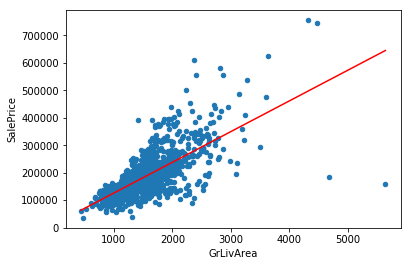

In [270]:
#Scatter plot.
ax = train_data_numeric_dropna.plot(kind="scatter", x="GrLivArea", y="SalePrice")

#Line of best fit (polynomial of degree 1).
w1, w0 = np.polyfit(train_data_numeric_dropna["GrLivArea"], train_data_numeric_dropna["SalePrice"],deg=1)

#Plot line of best fit.
rng = np.arange(np.min(train_data_numeric_dropna["GrLivArea"]),np.max(train_data_numeric_dropna["GrLivArea"]),0.1)
ax.plot(rng,[w0+w1*x for x in rng],color="red")

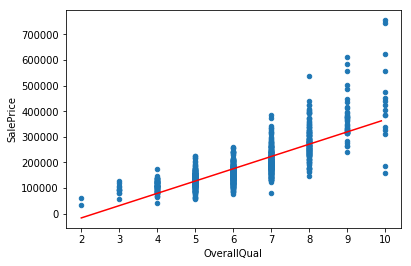

In [271]:
#Scatter plot.
ax = train_data_numeric_dropna.plot(kind="scatter", x="OverallQual", y="SalePrice")

#Line of best fit (polynomial of degree 1).
w1, w0 = np.polyfit(train_data_numeric_dropna["OverallQual"], train_data_numeric_dropna["SalePrice"],deg=1)

#Plot line of best fit.
rng = np.arange(np.min(train_data_numeric_dropna["OverallQual"]),np.max(train_data_numeric_dropna["OverallQual"]),0.1)
ax.plot(rng,[w0+w1*x for x in rng],color="red")

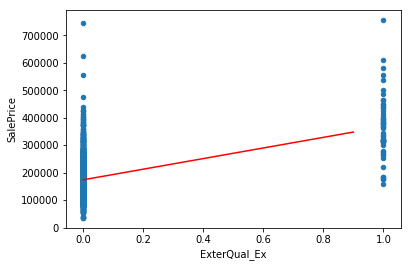

In [279]:
#Scatter plot.
ax = train_data_categ_dropna_dummies.plot(kind="scatter", x="ExterQual_Ex", y="SalePrice")

#Line of best fit (polynomial of degree 1).
w1, w0 = np.polyfit(train_data_categ_dropna_dummies["ExterQual_Ex"], train_data_categ_dropna_dummies["SalePrice"],deg=1)

#Plot line of best fit.
rng = np.arange(np.min(train_data_categ_dropna_dummies["ExterQual_Ex"]),np.max(train_data_categ_dropna_dummies["ExterQual_Ex"]),0.1)
ax.plot(rng,[w0+w1*x for x in rng],color="red")

### Algorithms and Techniques

I chose to use decision tree related algorithms, namely simple decision tree, random forest, and xgboost regression models.

A decision tree model splits the datapoints during training based on different categorizing questions regarding the datapoints’ characteristics and calculates the mean value for the target variable of the datapoints that falls into the certain category. During prediction the same questions serve for categorizing the datapoint which was learned during training and the model attributes the calculated mean value for the target variable that represents the leaf node (a leaf node is a group of datapoints that fall in the same category based on the questions).

Advantages of the decision tree model that it is easy to understand and interpret, can handle both numerical and categorical data and is able to handle large datasets (so it is scalable). Limitations of the model are the tendency to not being robust, the problem of finding the optimal decision tree is an np-complete problem (resulting in the need for using heuristics) and tendency to create over-complex models which overfit the data.

The random forest algorithm is an ensemble method which incorporates many simple decision trees at training time and outputting the mean prediction of the individual trees.

Its advantage is it can solve many limitations of the simple decision tree algorithm, but in turn it’s a little bit less easy to interpret and harder to track down its functioning (so it’s more like a black box).

The gradient boosting decision tree algorithm is also an ensemble method which incorporates decision trees but it is built iteratively to add a new decision tree to the ensemble in every cycle to minimize prediction errors. The optimal number of estimaters and the learning rate has to be found. Xgboost is a higly optimized implementation of this kind of algorithm.


### Benchmark
A benchmark model could be a really simple one, that many people use in everyday practice when considering to buy a home, namely that how big is the home in square feets - this is basically a linear regression problem with only one predictor. But to have a benchmark model that is more difficult to supersede, I will use a linear regression model with the same predictors that I will use for the final xgboost model. A linear regression model can be implemented easily with the help of sklearn and I will compare my final results to this baseline model. The metric that I will use for comparison is the mean absolute error of the models.

## III. Methodology
_(approx. 3-5 pages)_

### Data Preprocessing

Based on the following analysis I identified 12 numerical variable that I will exclude from further usage because they don't show strong enough or any linear correlation with sale price: Id, MSSubClass, OverallCond, BsmtFinSF2, LowQualFinSf, BsmtHalfBath, KitchenAbvGr, EnclosedPorch, 3SsnPorch, MiscVal, MoSold, YrSold.

C:\Users\Jancsi\Anaconda3\lib\site-packages\matplotlib\pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


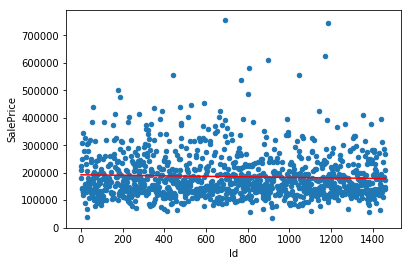

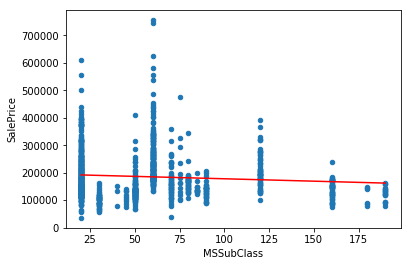

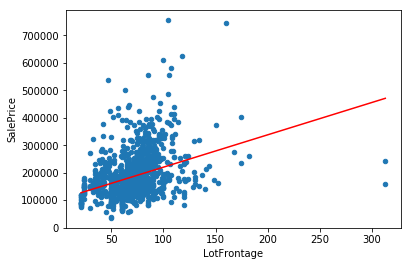

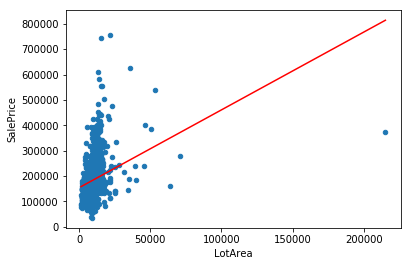

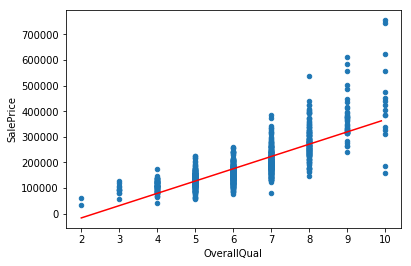

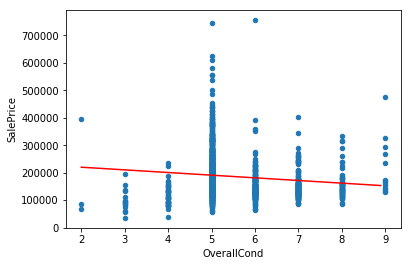

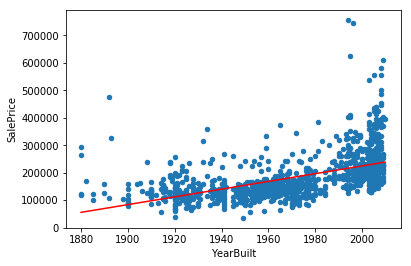

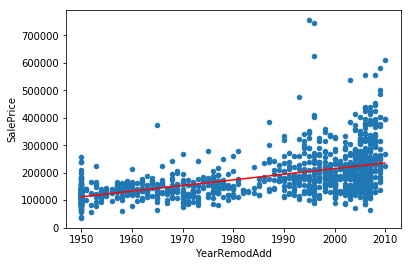

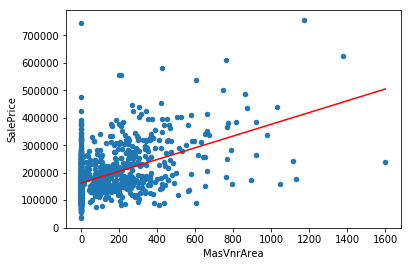

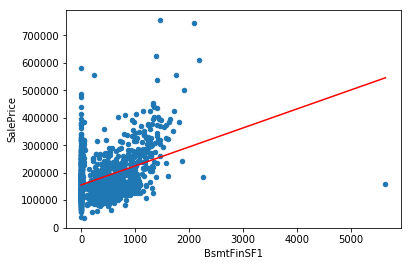

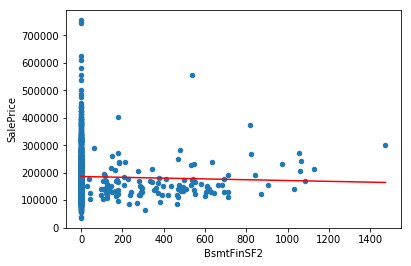

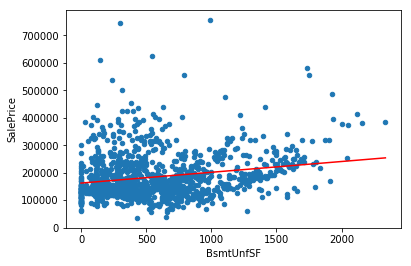

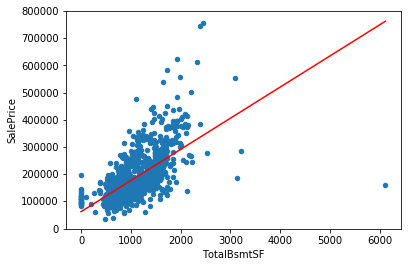

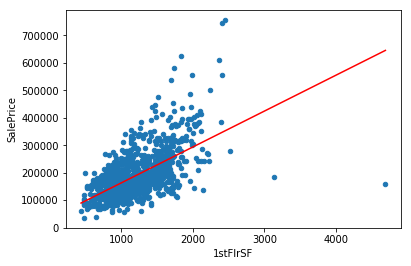

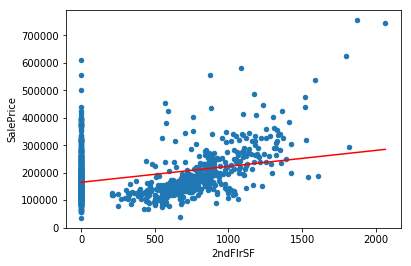

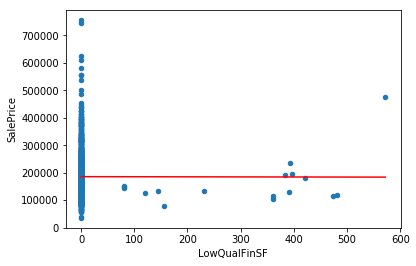

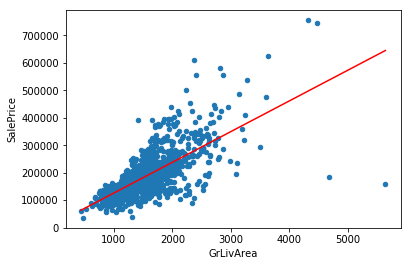

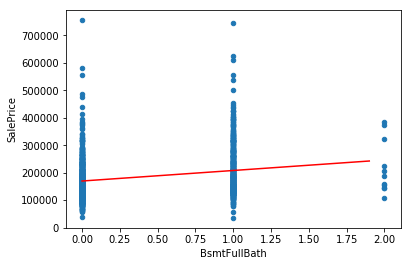

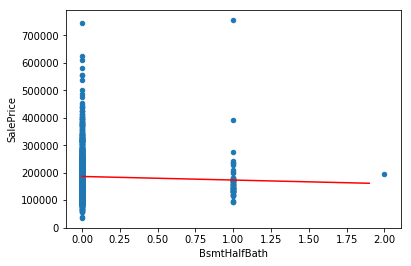

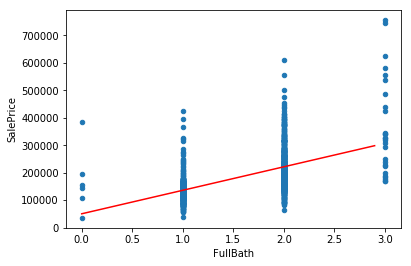

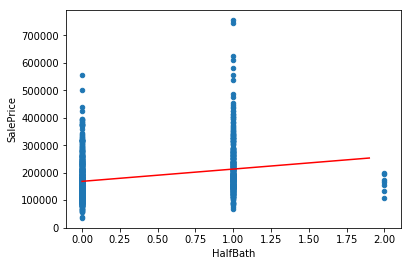

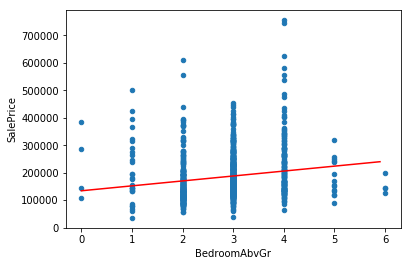

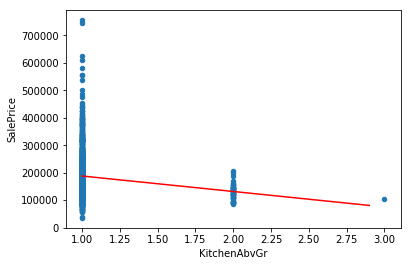

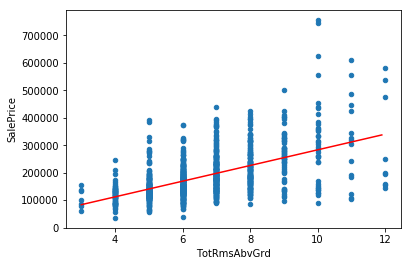

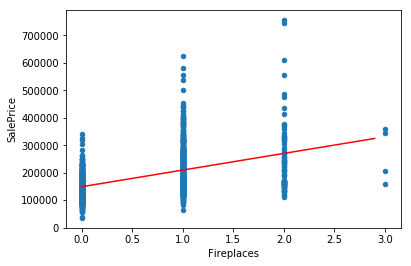

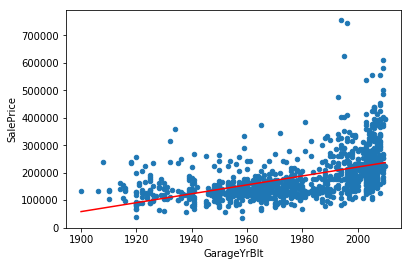

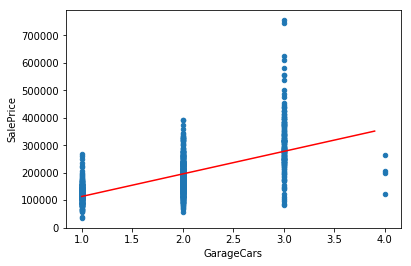

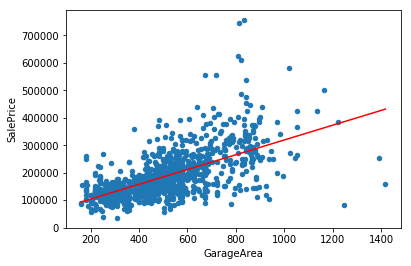

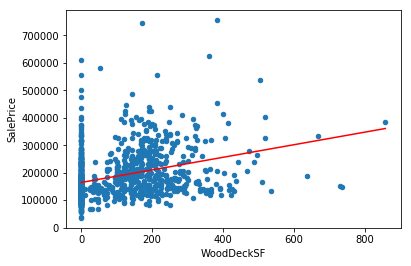

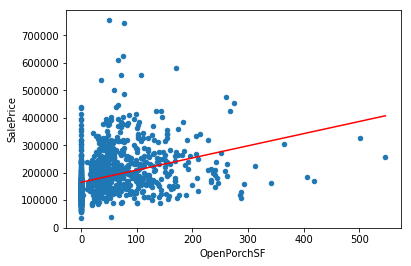

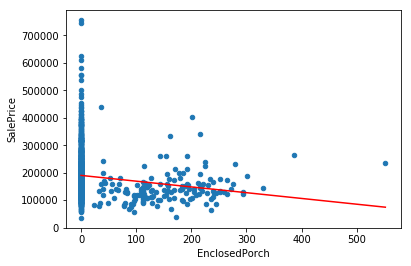

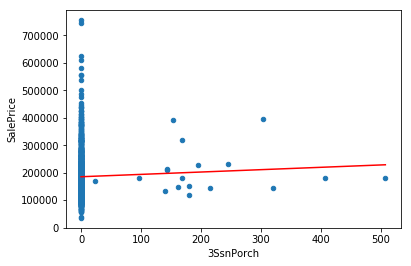

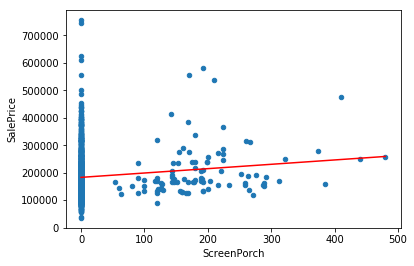

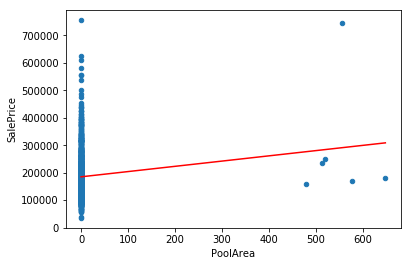

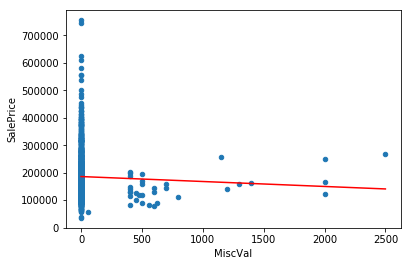

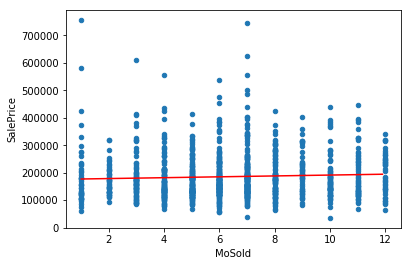

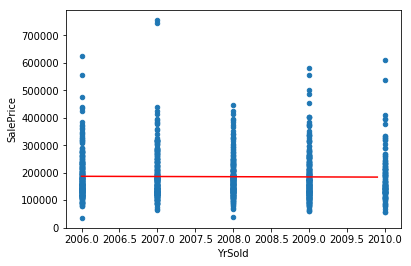

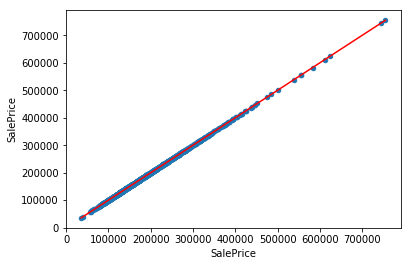

In [273]:
# plotting relationships between sale prices and numerical variable values
train_data_numeric_dropna = train_data_numeric.dropna()

for feature in train_data_numeric.columns:
    #Scatter plot.
    ax = train_data_numeric_dropna.plot(kind="scatter", x=feature,y="SalePrice")

    #Line of best fit (polynomial of degree 1).
    w1, w0 = np.polyfit(train_data_numeric_dropna[feature], train_data_numeric_dropna["SalePrice"],deg=1)

    #Plot line of best fit.
    rng = np.arange(np.min(train_data_numeric_dropna[feature]),np.max(train_data_numeric_dropna[feature]),0.1)
    ax.plot(rng,[w0+w1*x for x in rng],color="red")

So let's drop these columns from numerical training data.

In [367]:
train_data_numeric_selected = train_data_numeric.drop(columns=['Id', 'MSSubClass', 'OverallCond', 'BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'EnclosedPorch', '3SsnPorch', 'MiscVal', 'MoSold', 'YrSold'])
print(train_data_numeric_selected.shape)
test_data_numeric_selected = test_data_numeric.drop(columns=['Id', 'MSSubClass', 'OverallCond', 'BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'EnclosedPorch', '3SsnPorch', 'MiscVal', 'MoSold', 'YrSold'])
print(test_data_numeric_selected.shape)

(1460, 26)
(1459, 25)


In [369]:
train_data_categ['SalePrice'] = train_data_original.SalePrice

C:\Users\Jancsi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


C:\Users\Jancsi\Anaconda3\lib\site-packages\matplotlib\pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


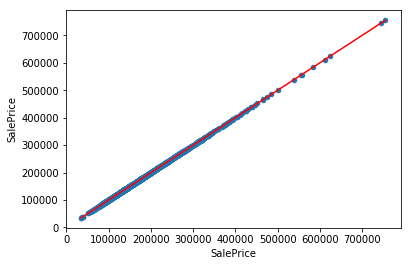

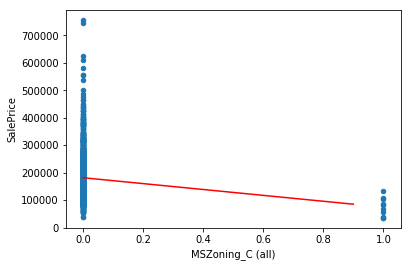

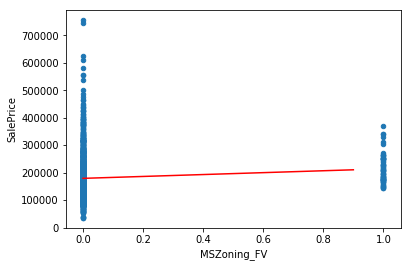

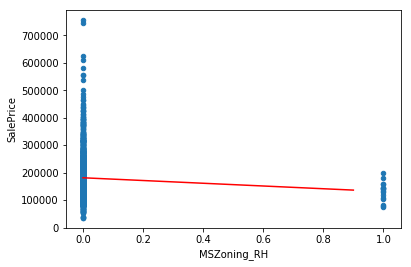

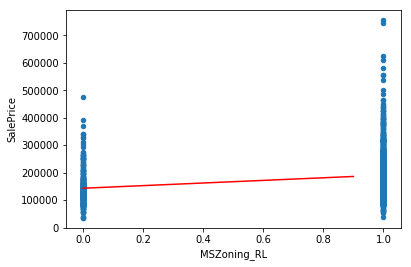

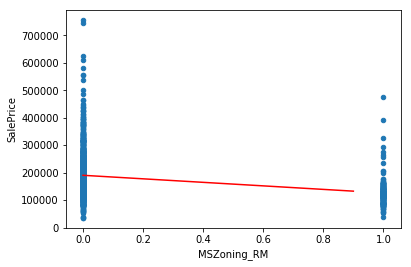

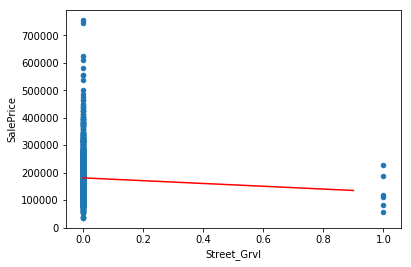

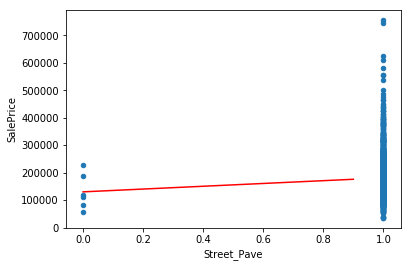

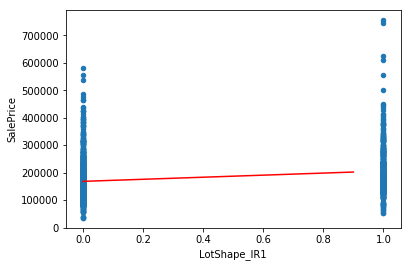

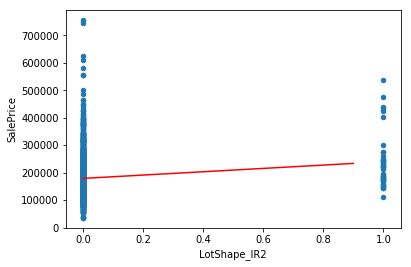

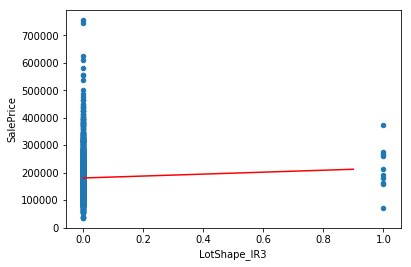

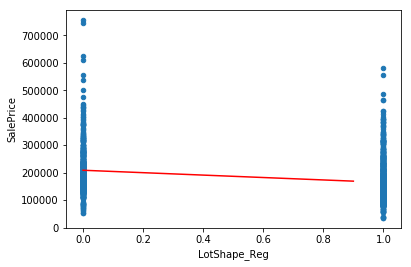

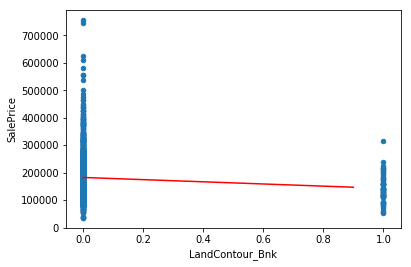

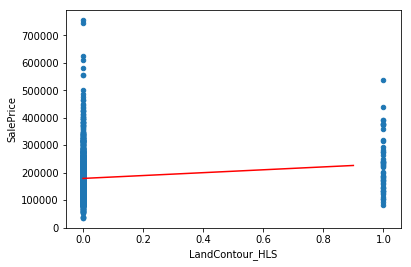

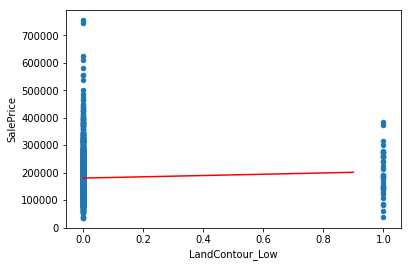

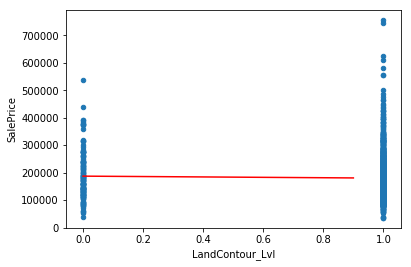

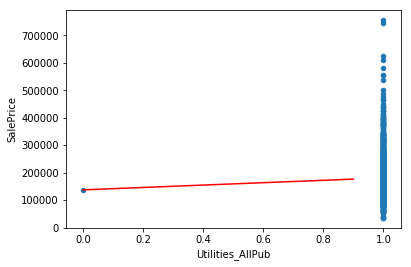

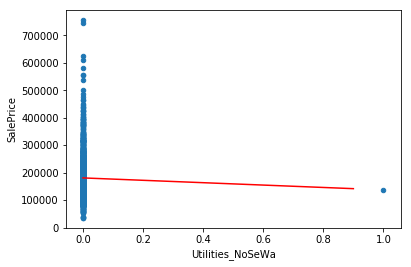

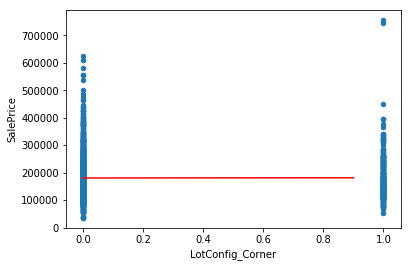

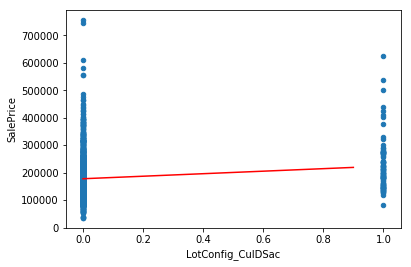

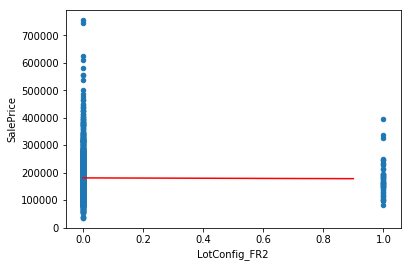

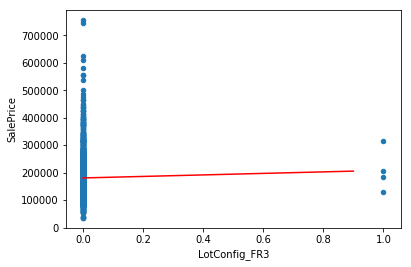

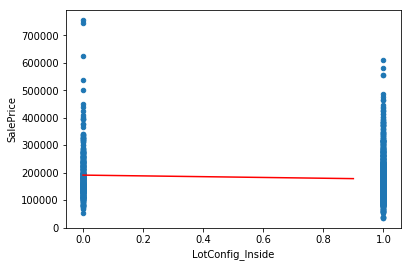

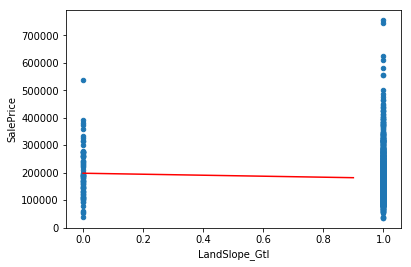

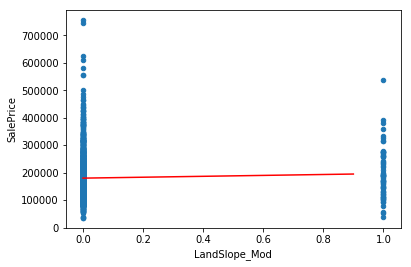

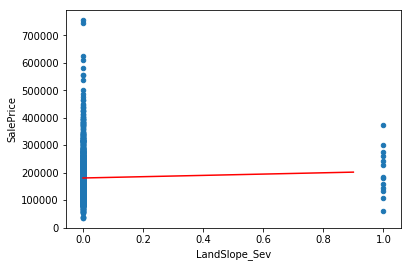

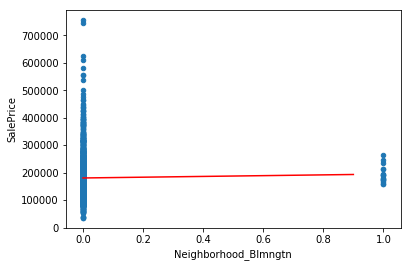

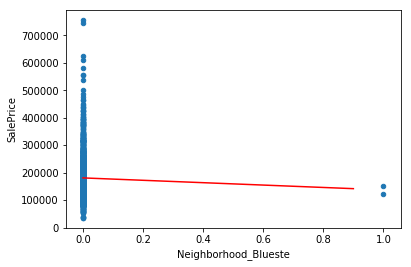

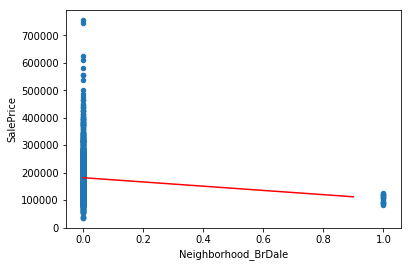

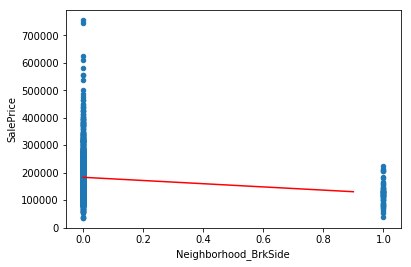

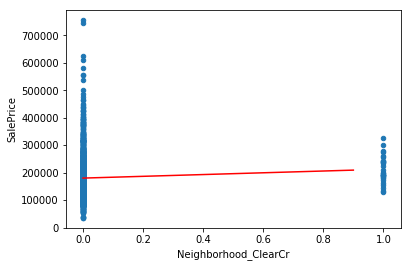

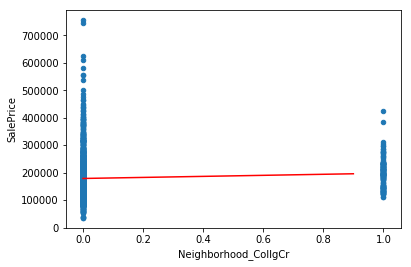

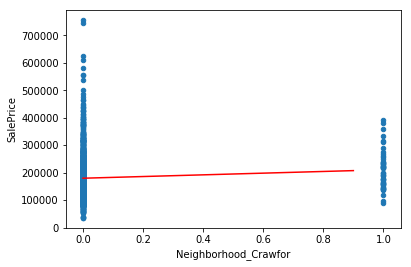

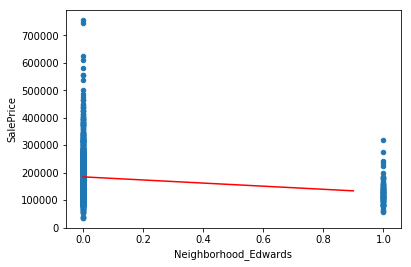

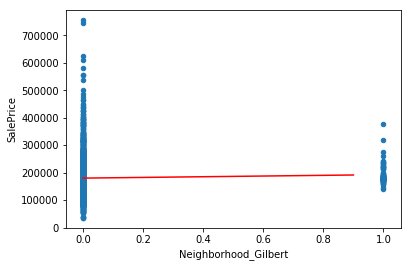

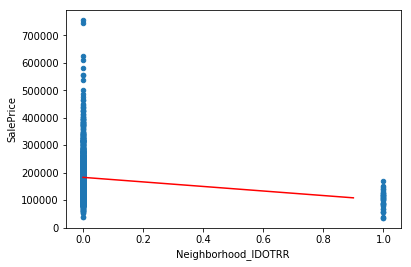

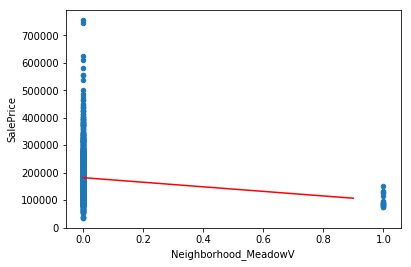

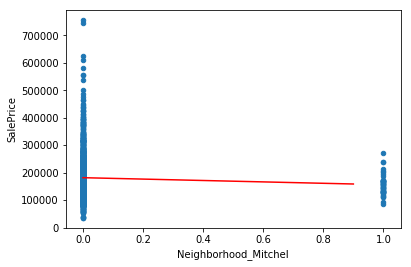

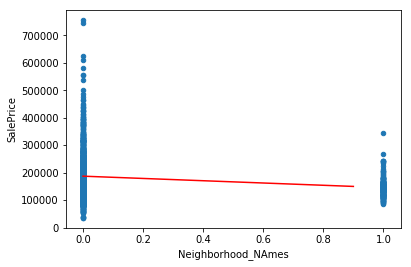

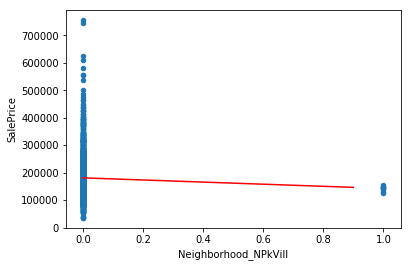

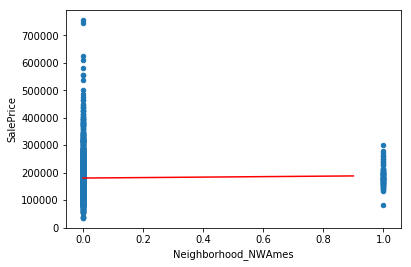

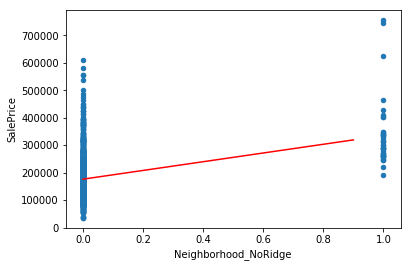

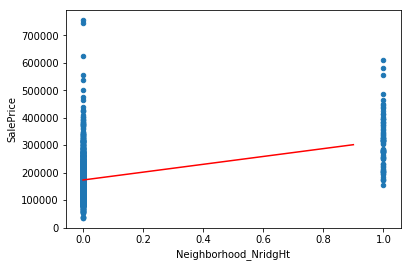

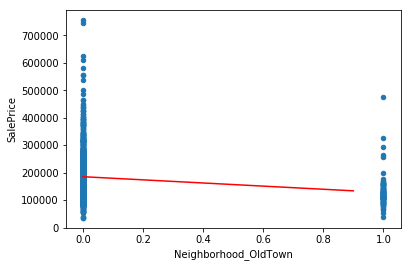

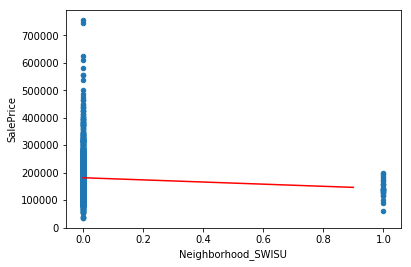

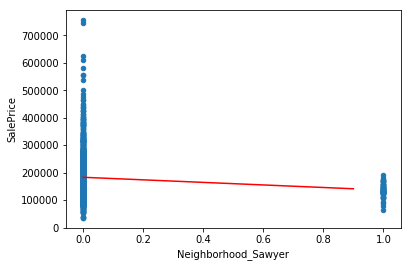

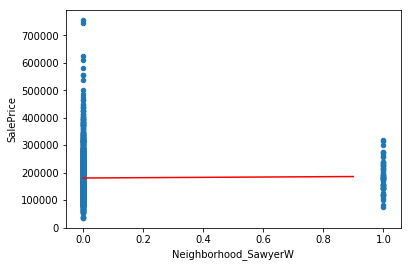

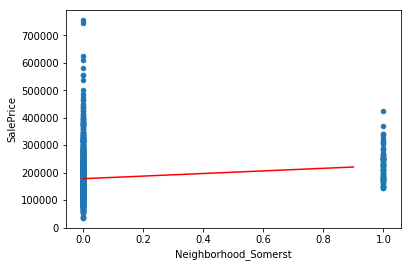

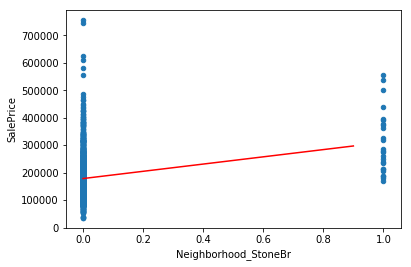

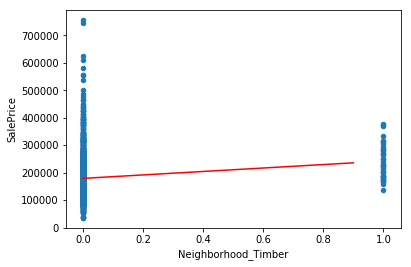

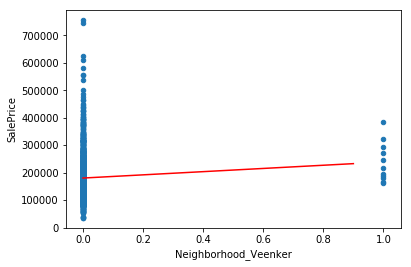

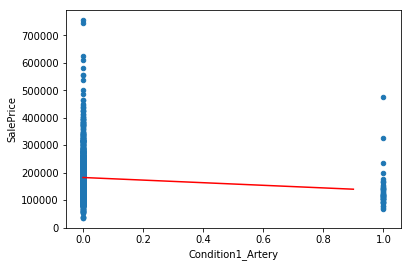

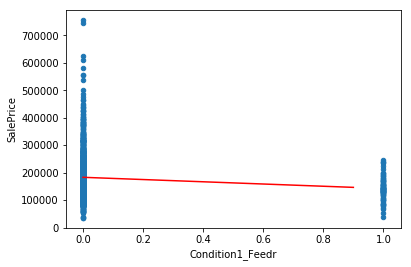

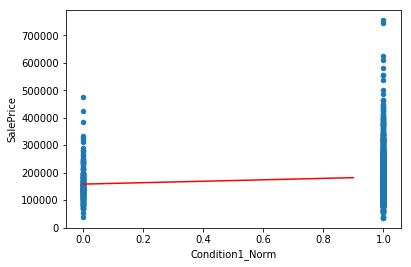

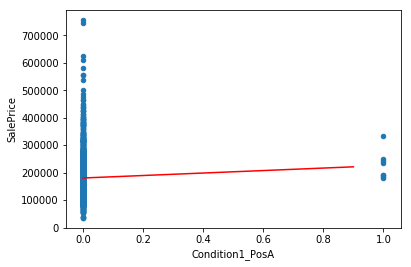

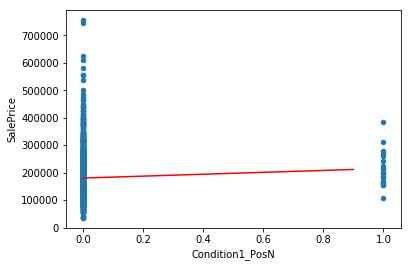

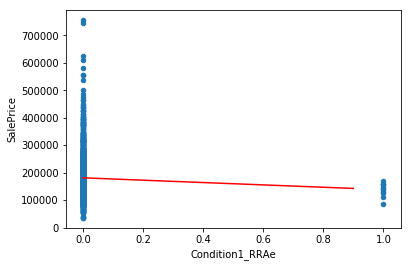

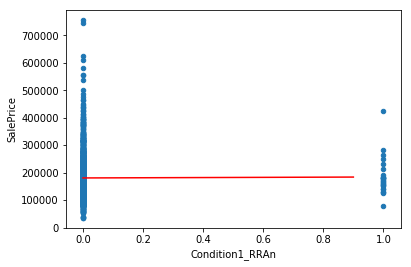

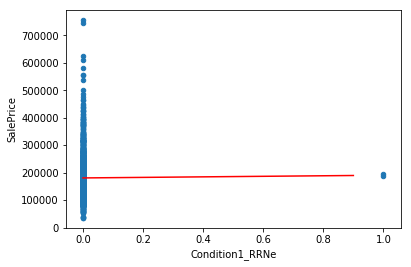

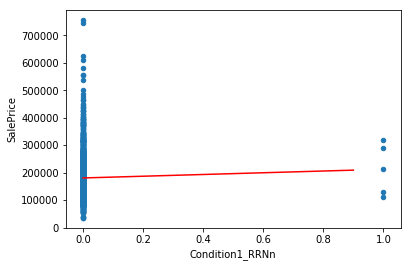

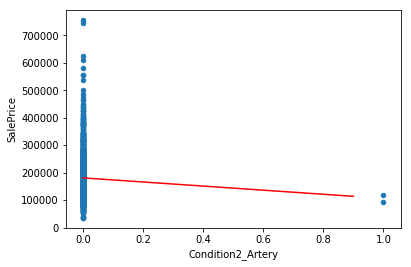

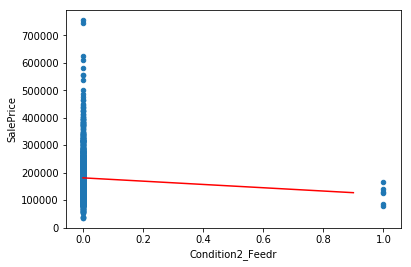

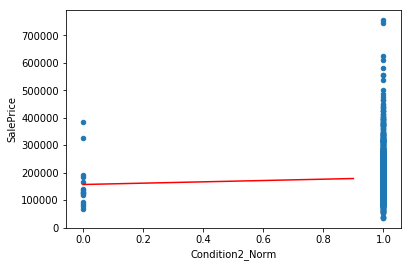

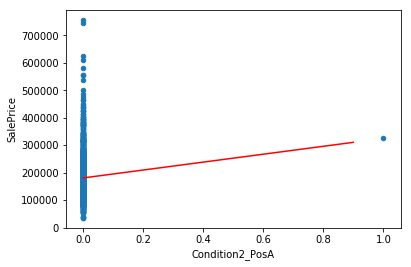

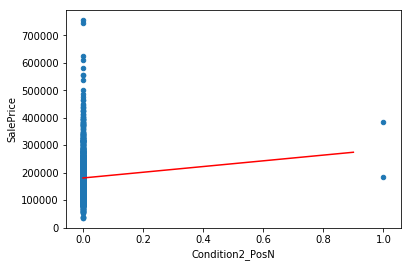

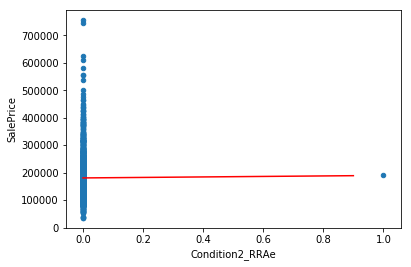

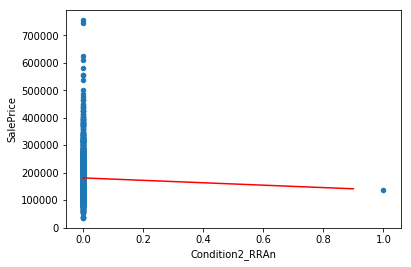

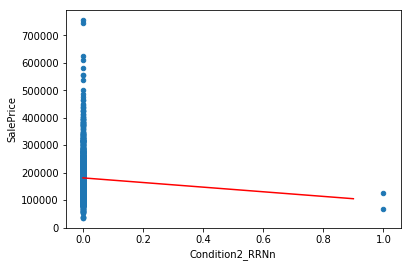

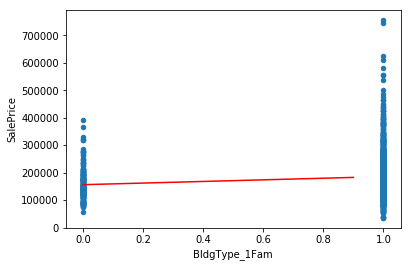

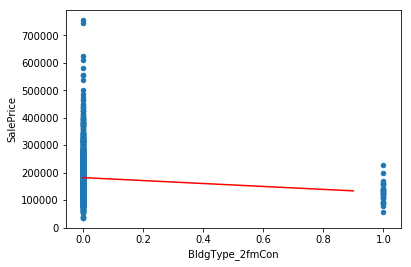

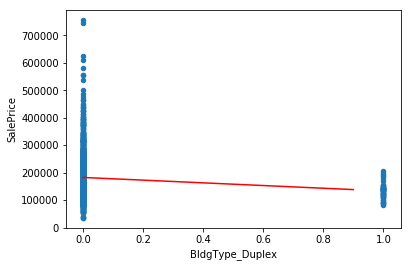

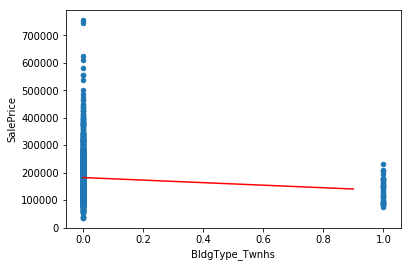

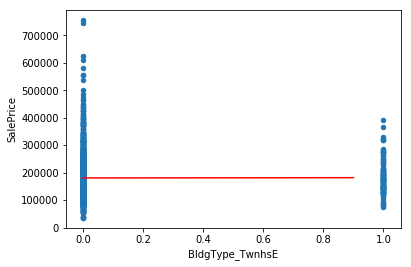

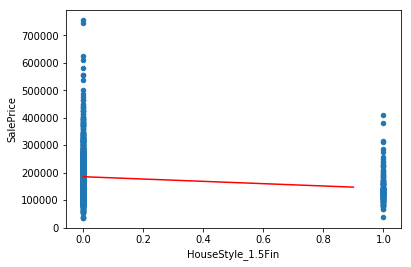

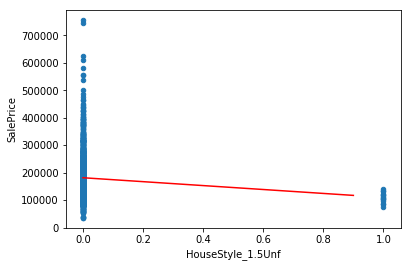

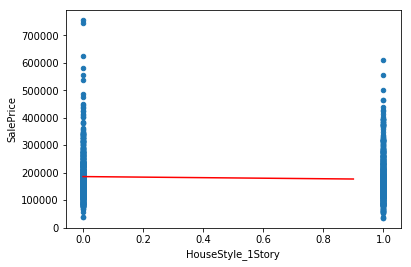

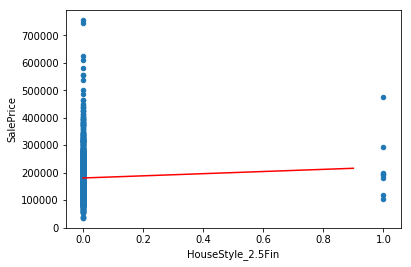

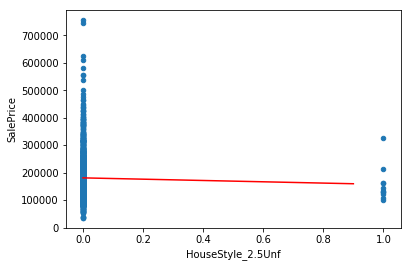

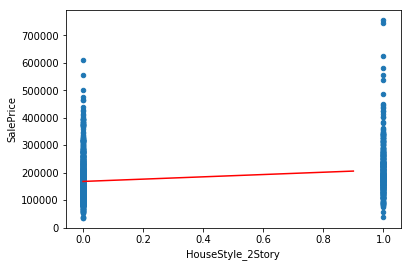

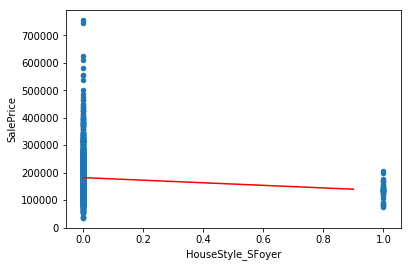

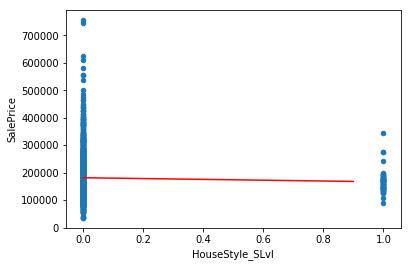

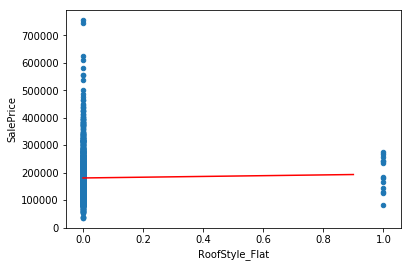

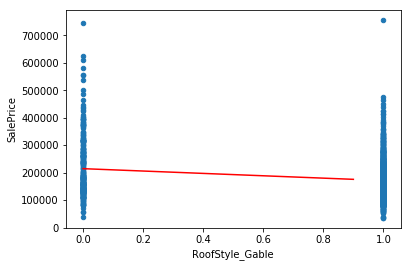

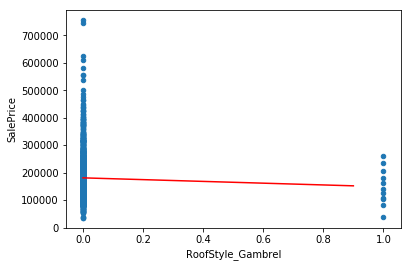

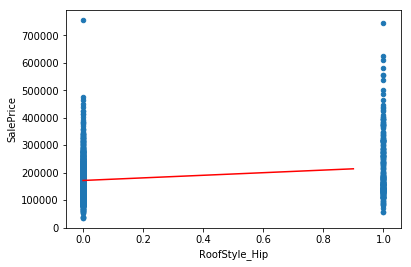

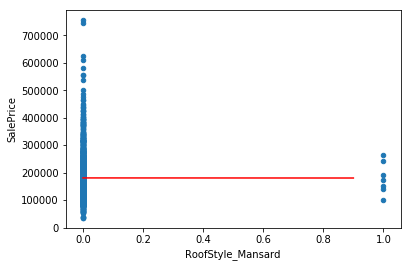

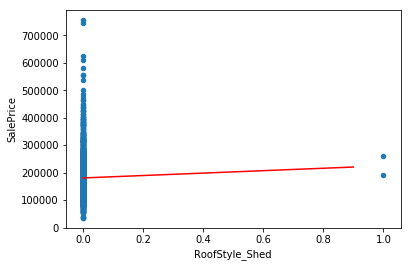

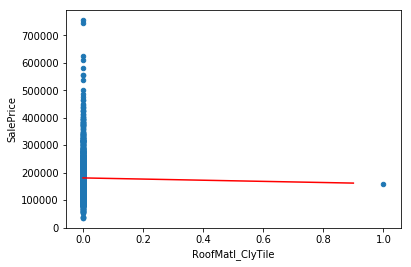

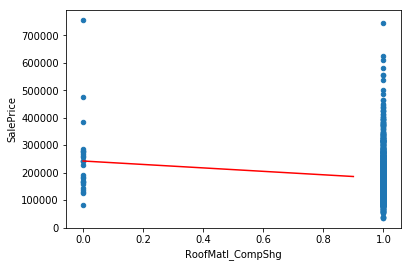

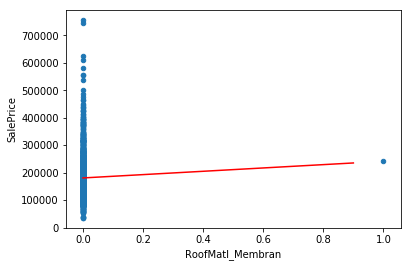

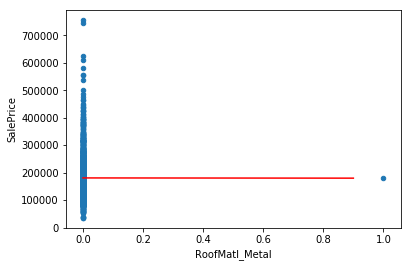

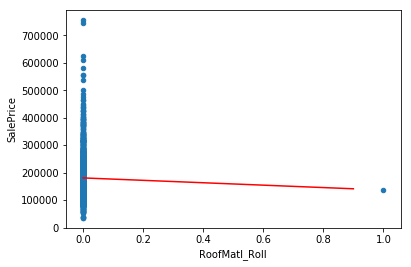

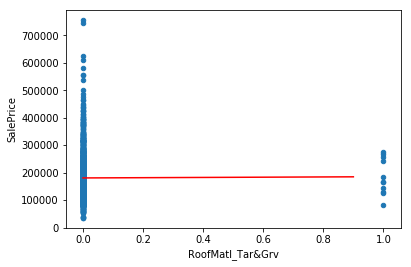

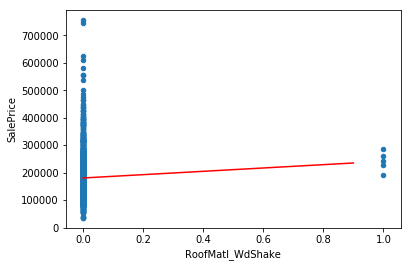

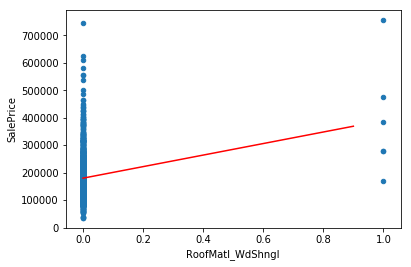

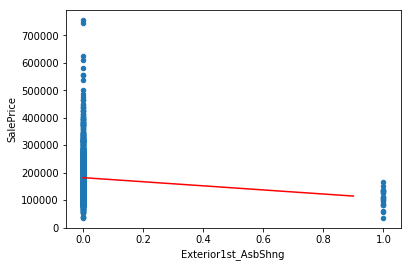

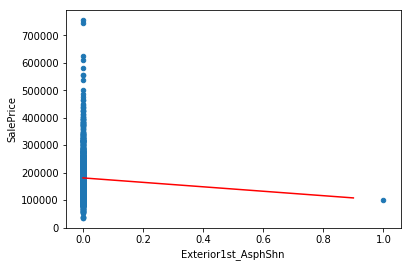

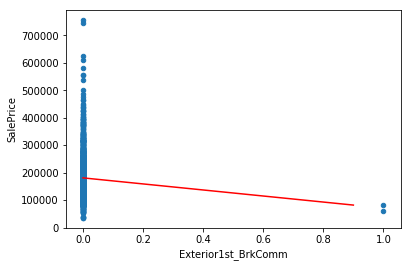

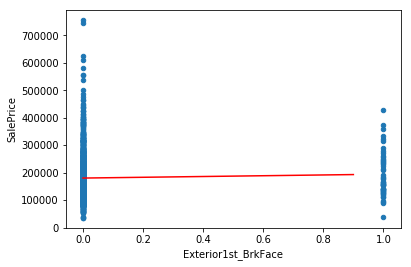

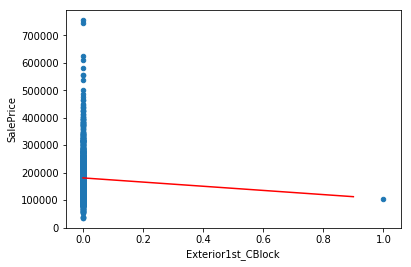

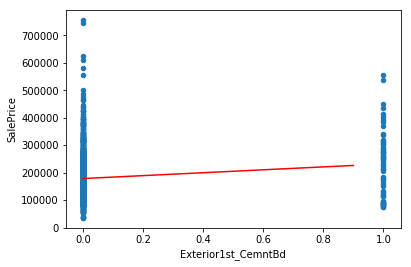

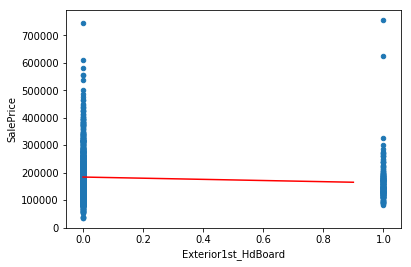

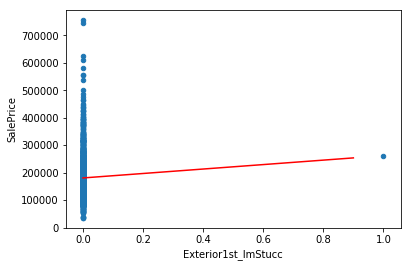

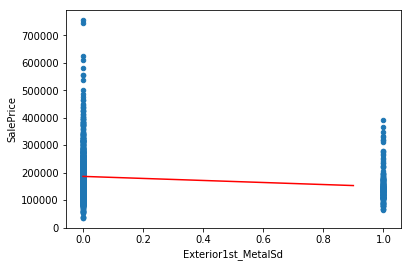

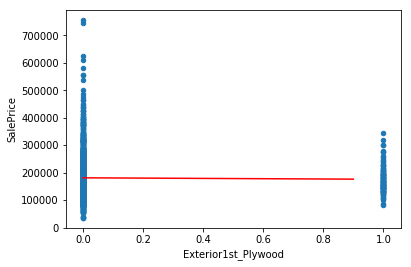

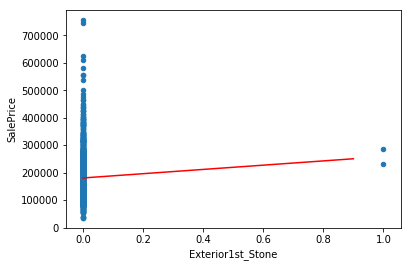

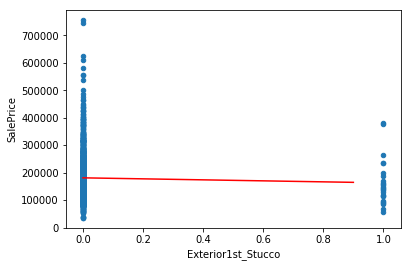

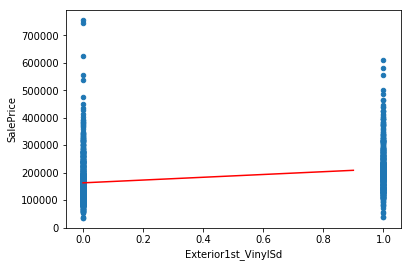

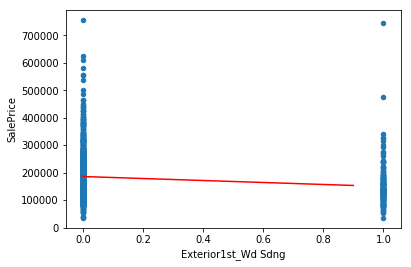

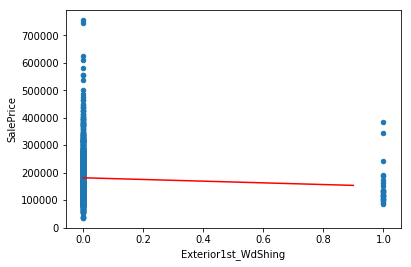

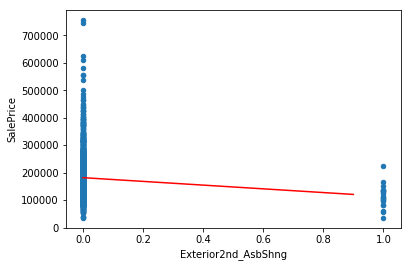

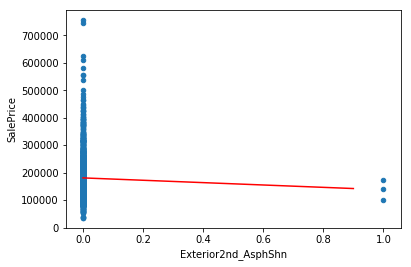

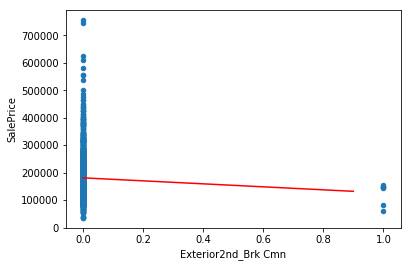

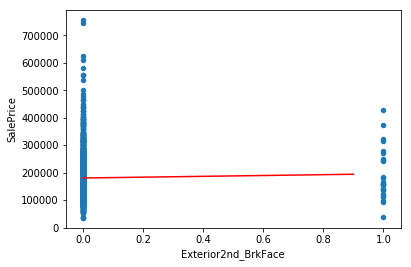

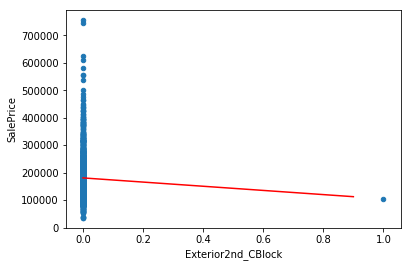

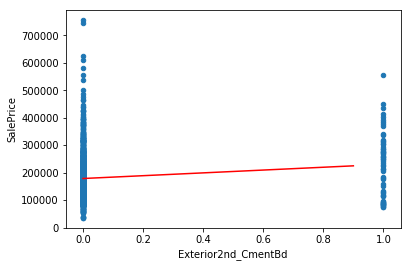

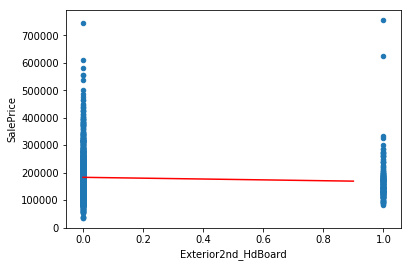

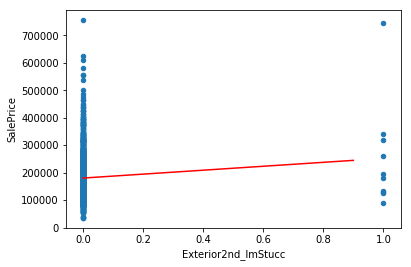

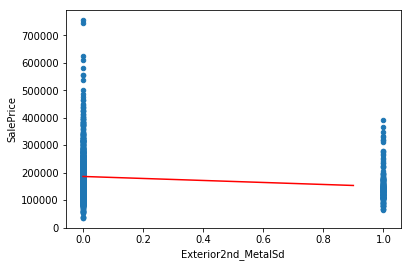

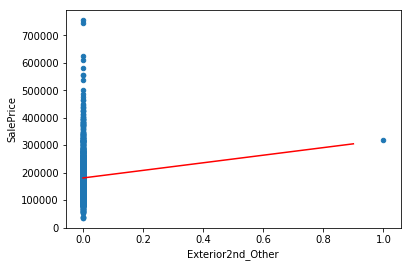

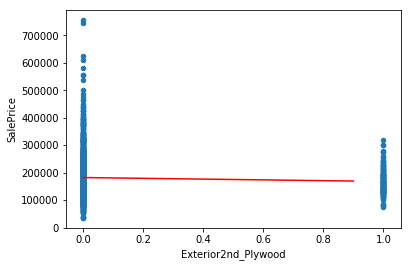

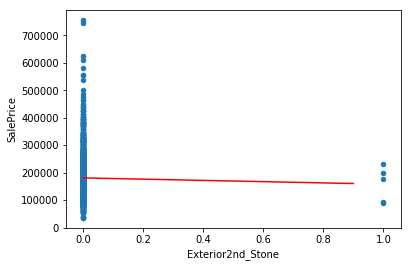

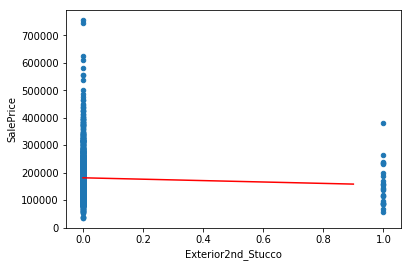

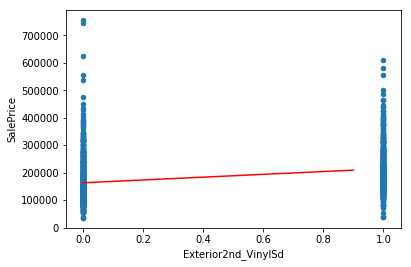

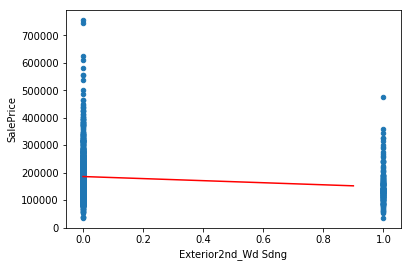

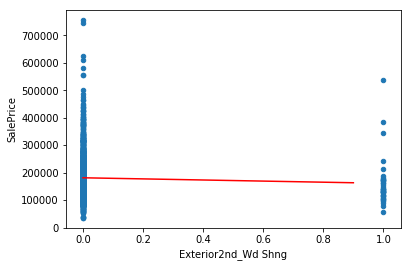

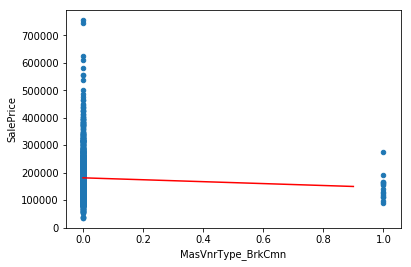

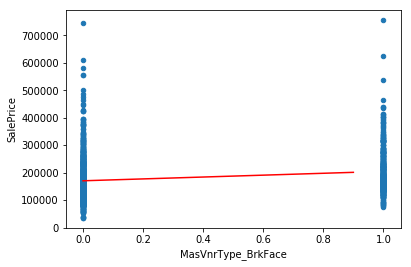

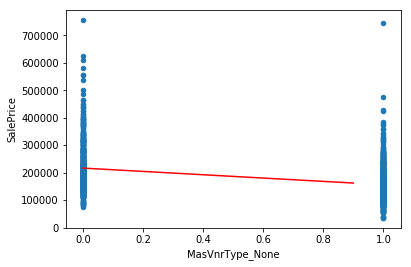

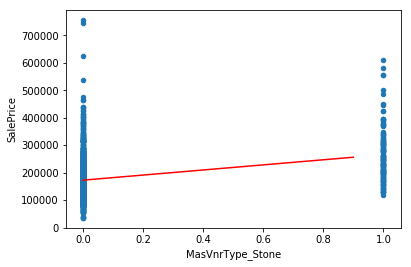

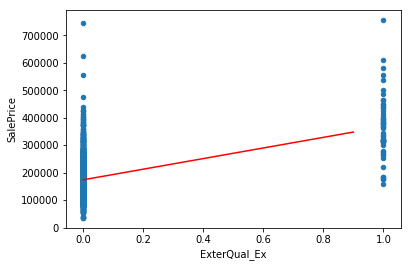

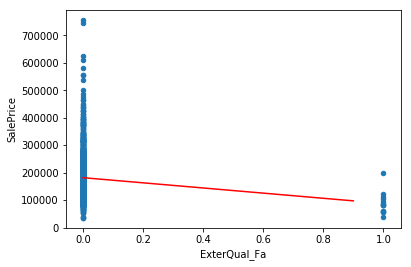

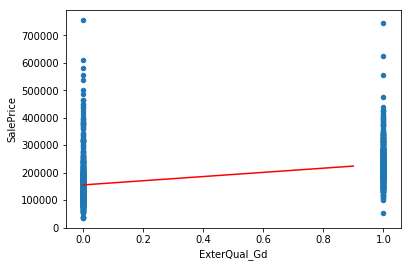

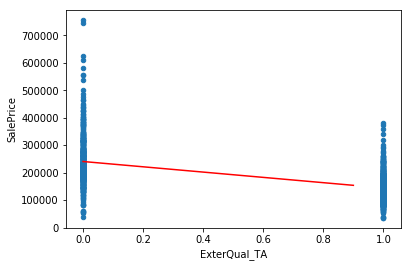

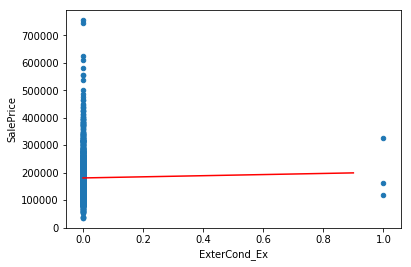

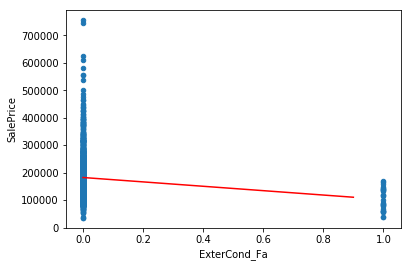

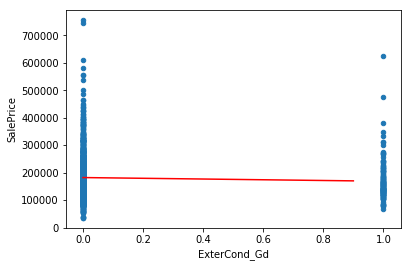

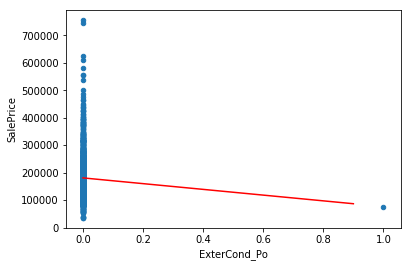

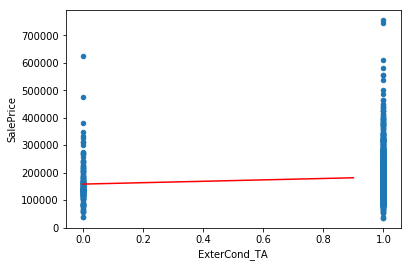

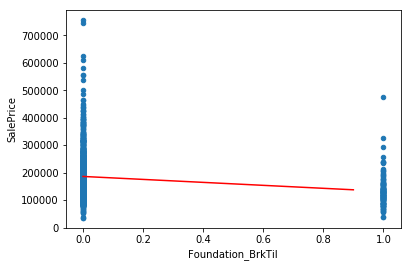

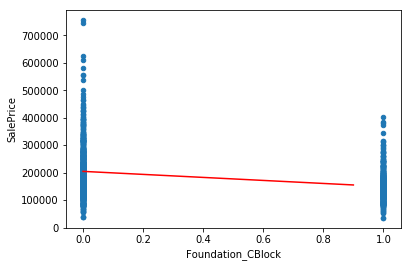

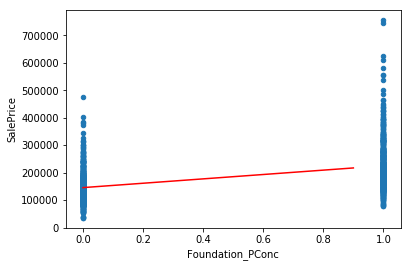

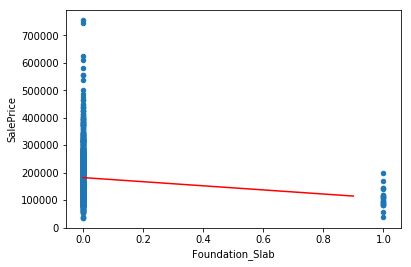

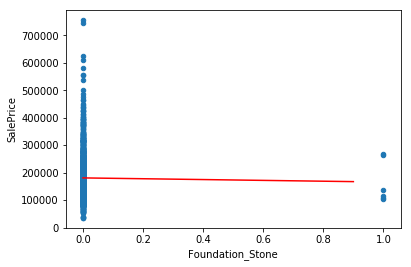

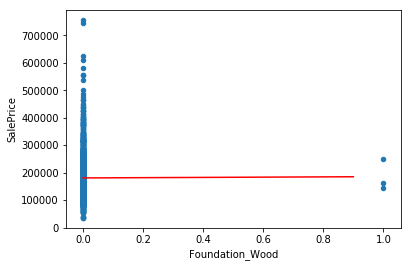

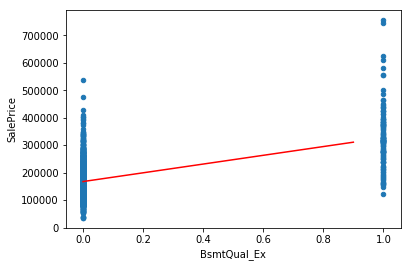

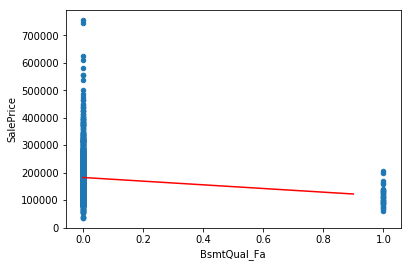

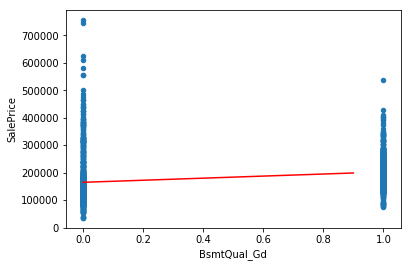

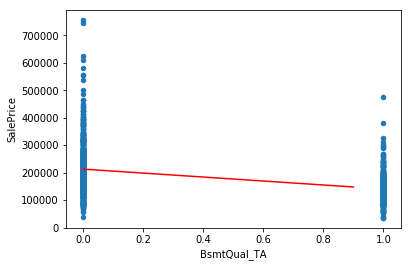

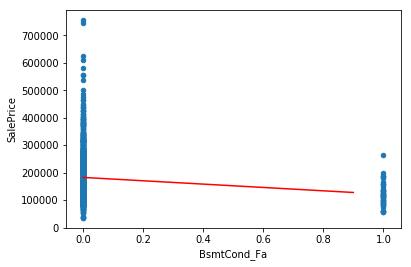

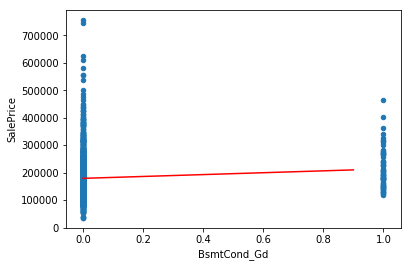

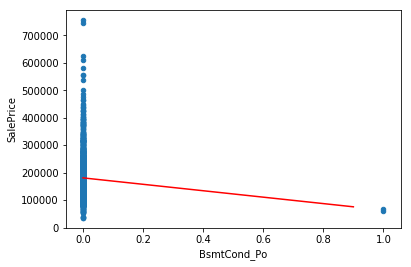

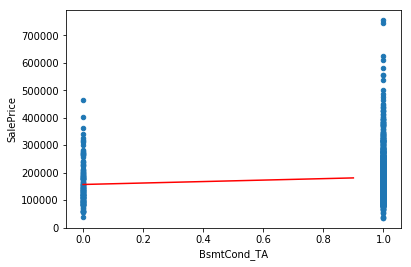

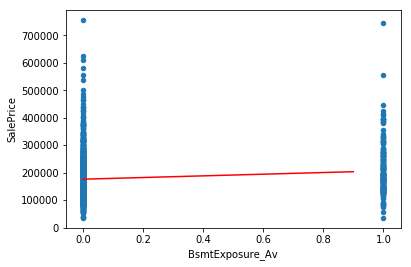

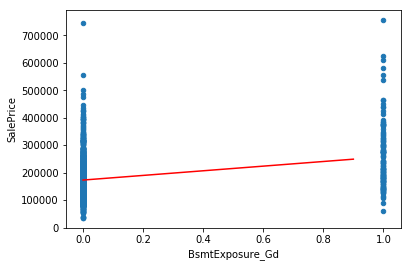

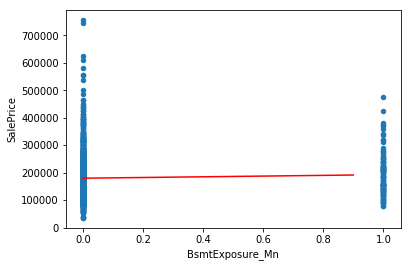

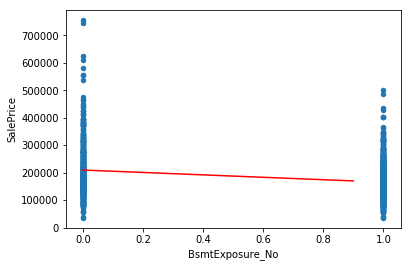

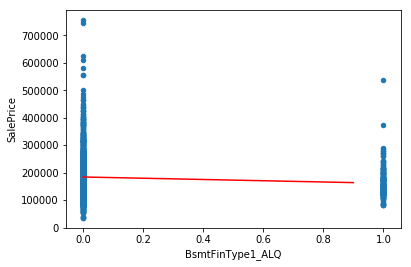

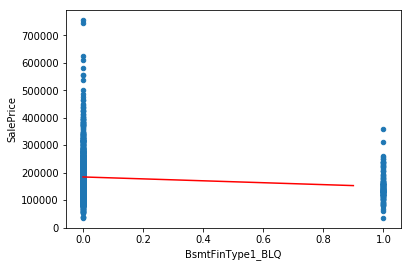

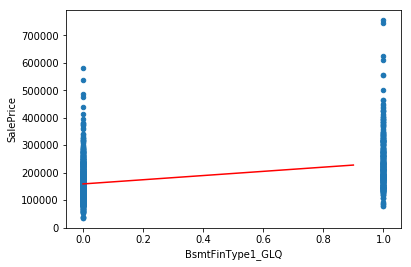

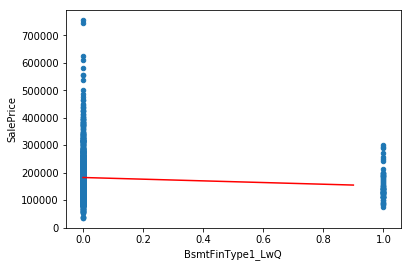

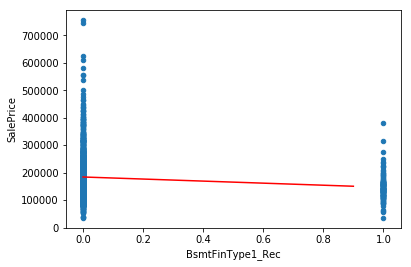

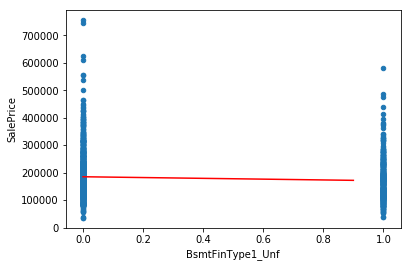

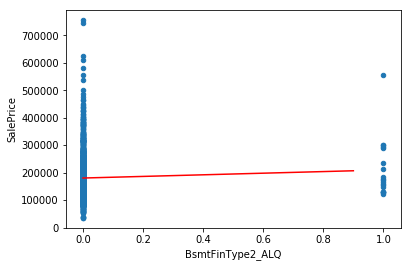

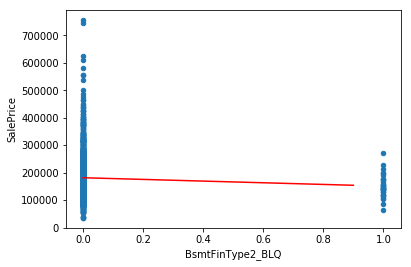

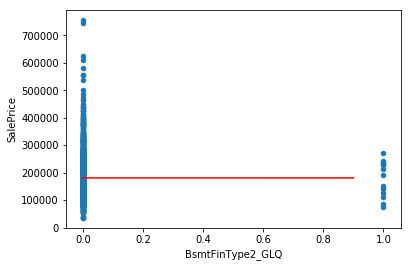

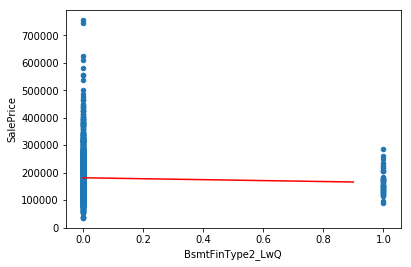

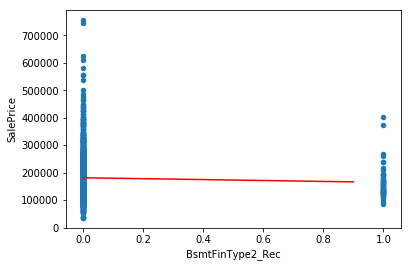

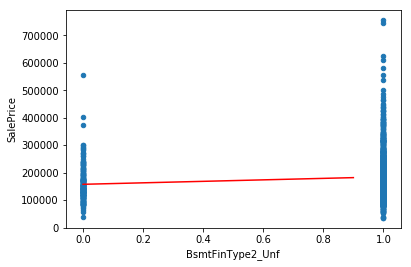

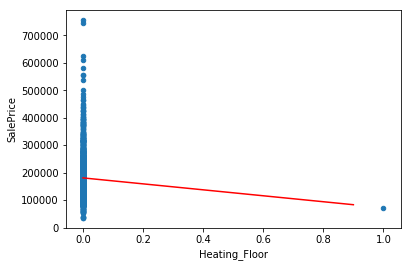

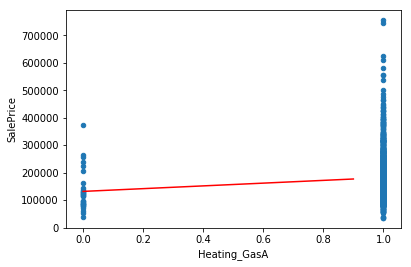

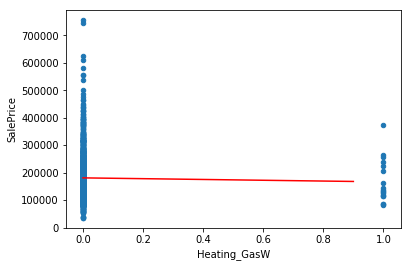

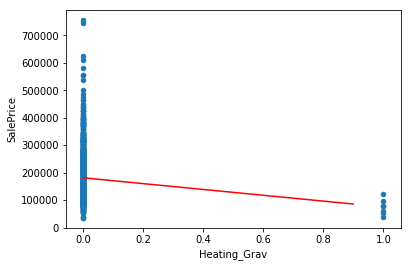

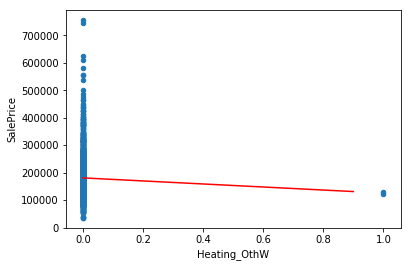

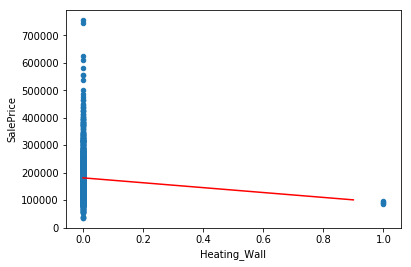

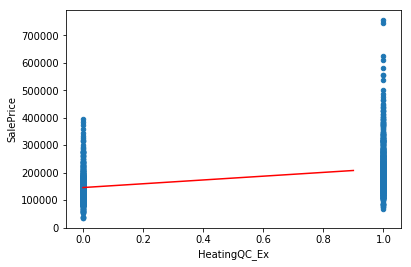

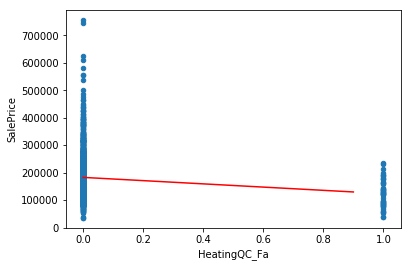

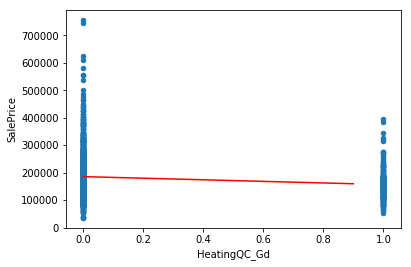

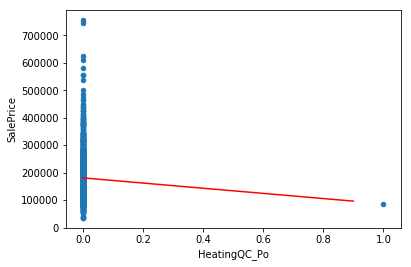

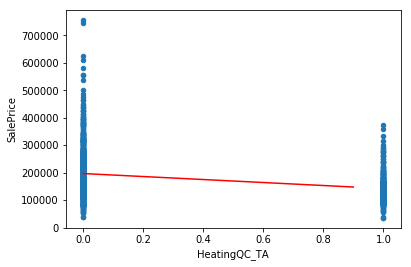

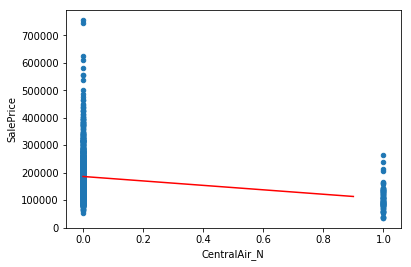

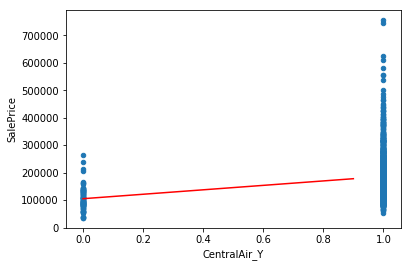

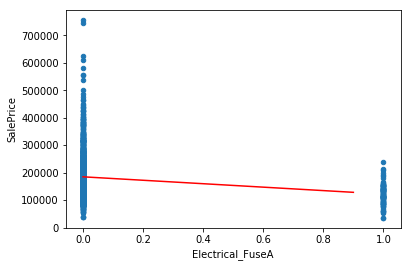

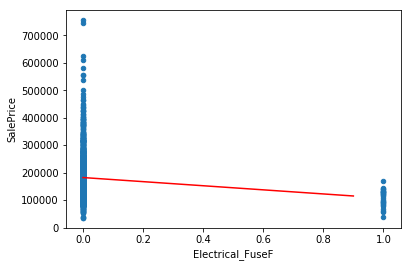

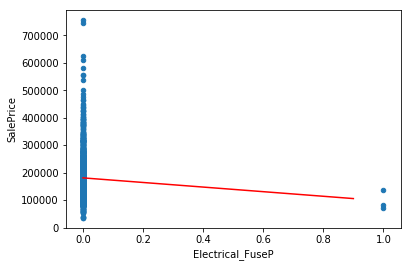

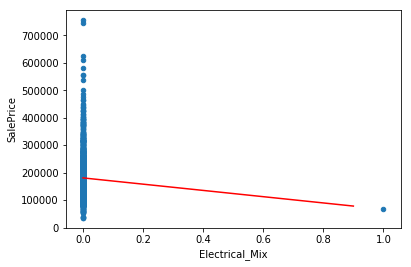

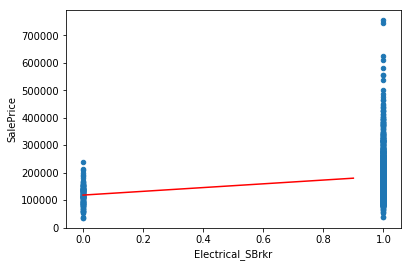

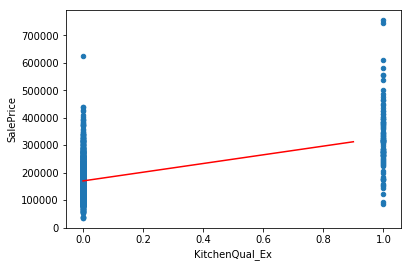

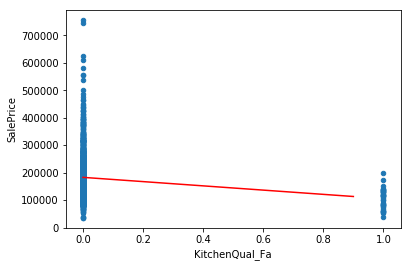

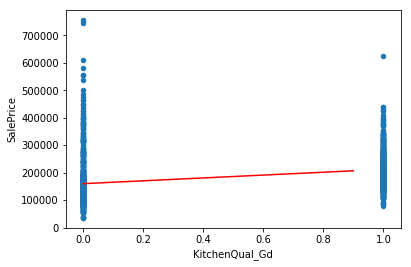

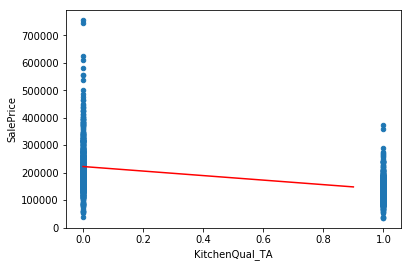

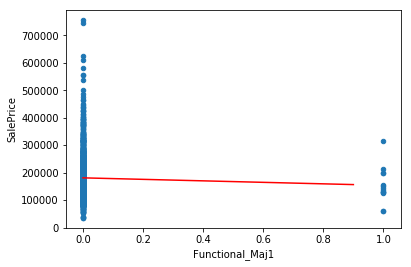

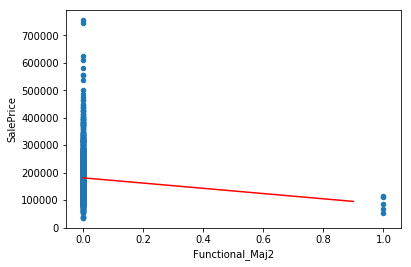

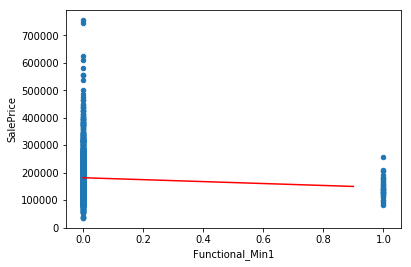

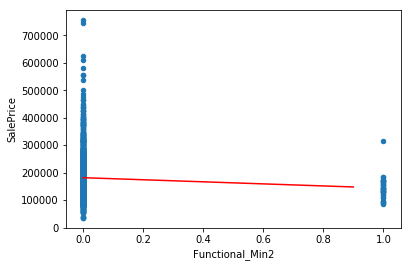

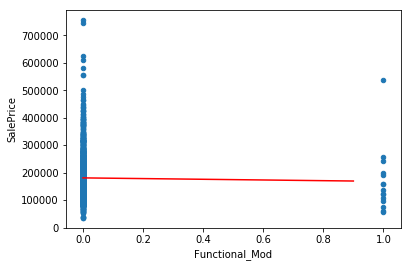

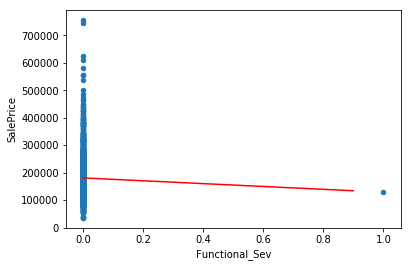

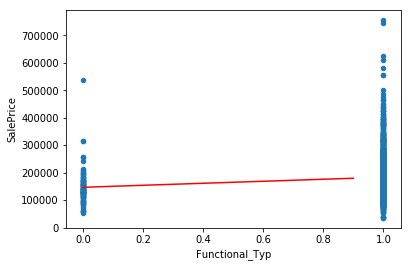

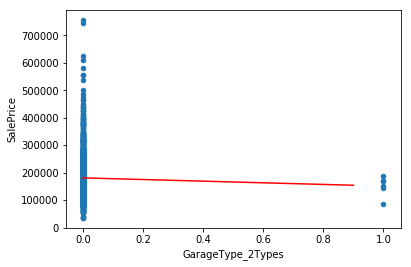

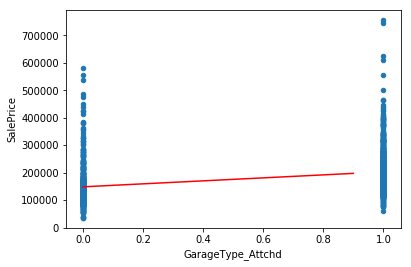

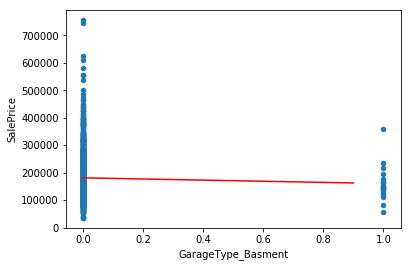

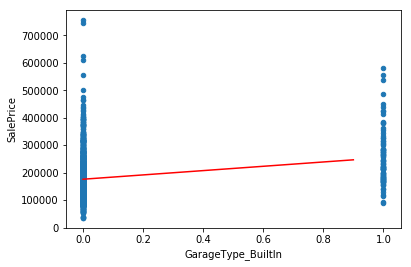

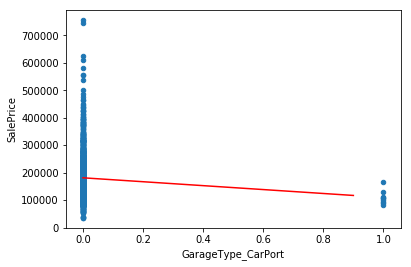

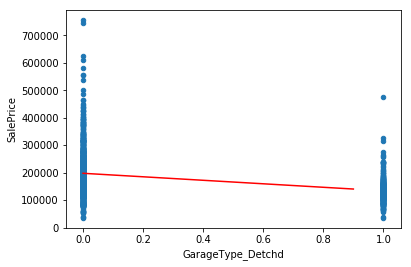

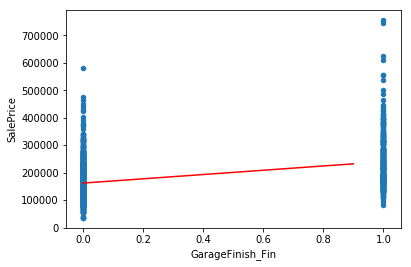

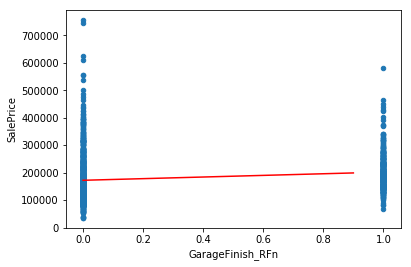

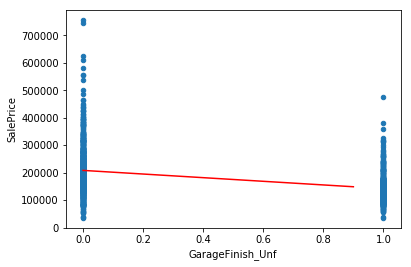

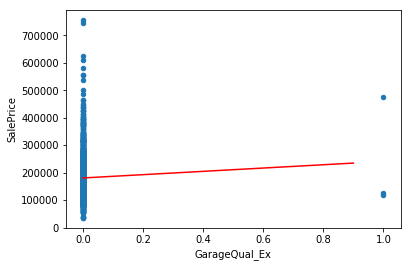

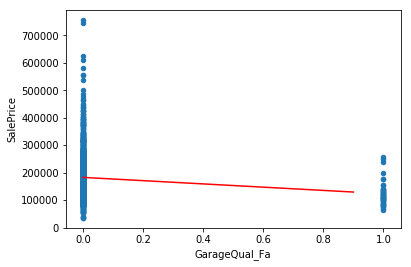

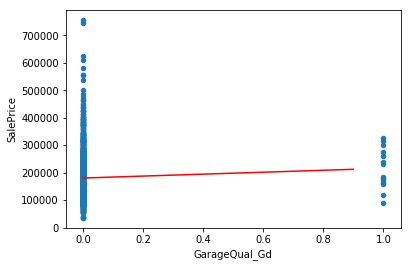

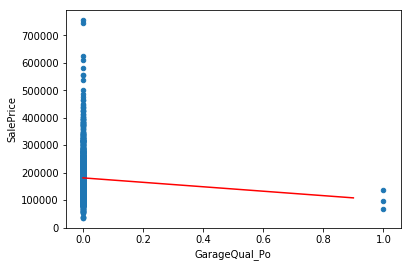

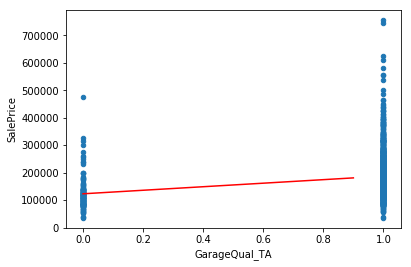

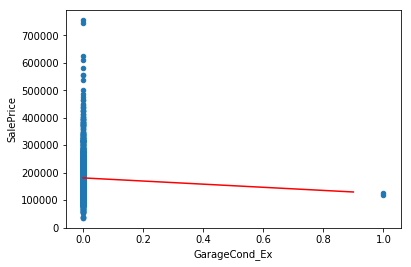

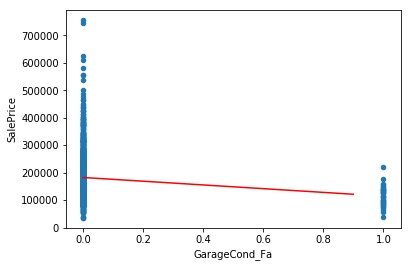

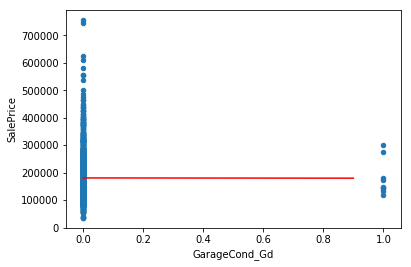

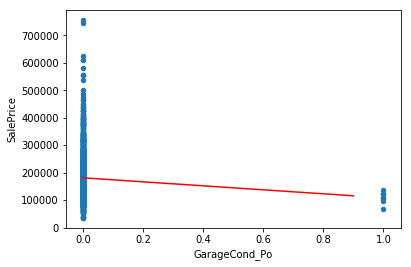

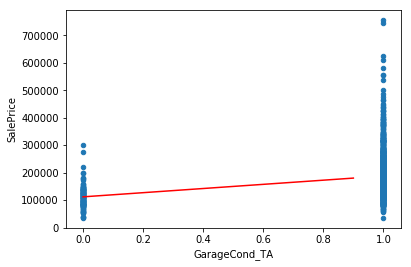

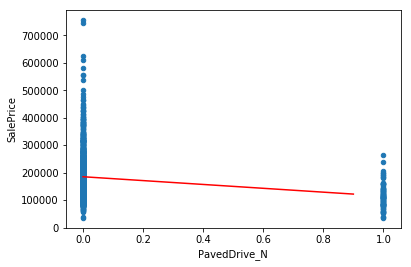

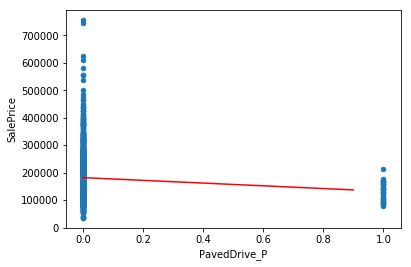

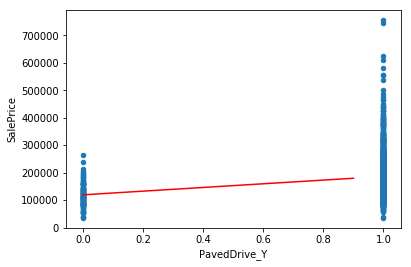

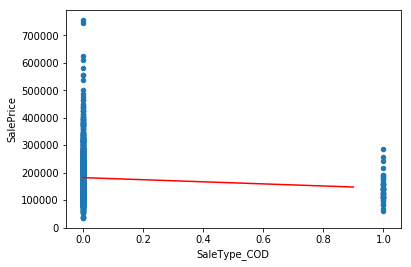

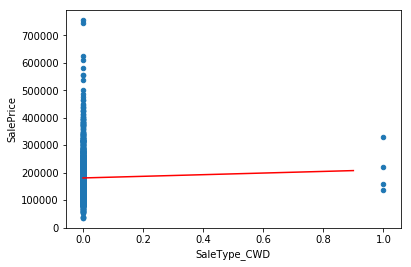

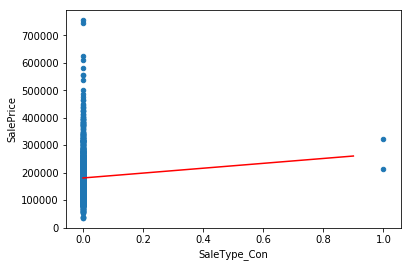

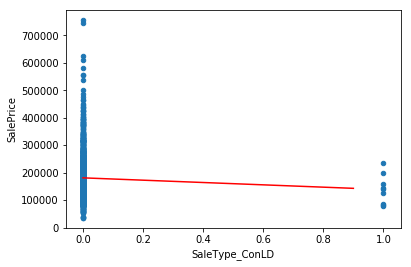

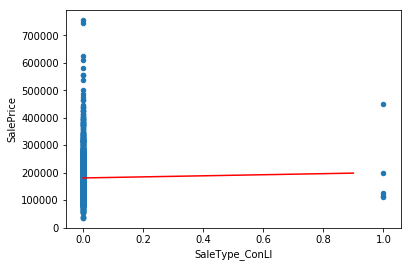

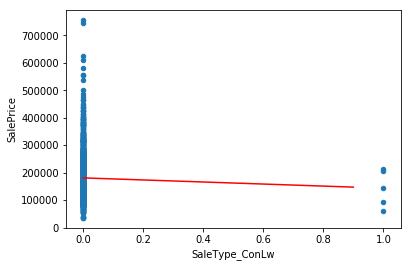

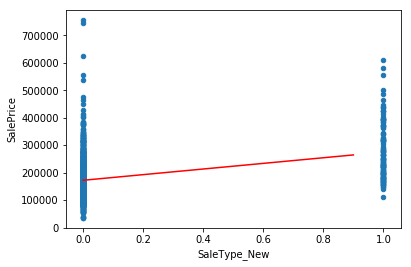

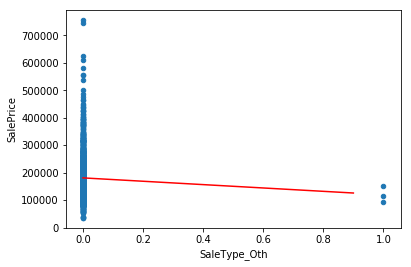

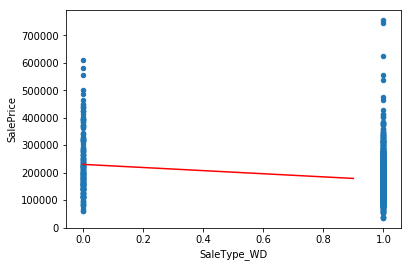

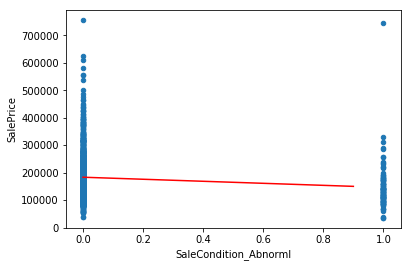

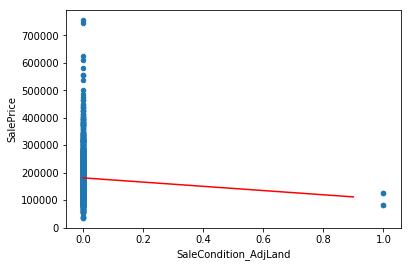

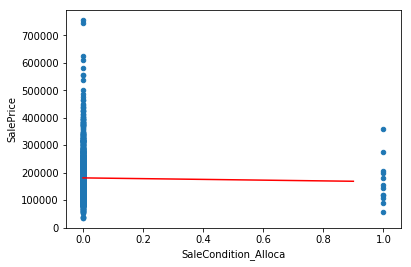

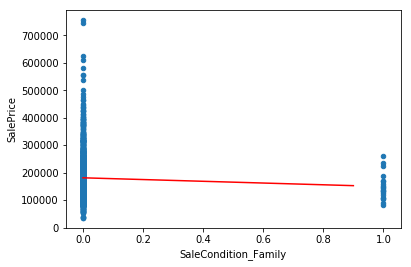

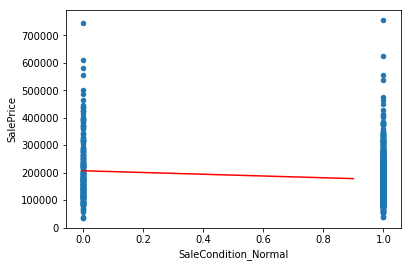

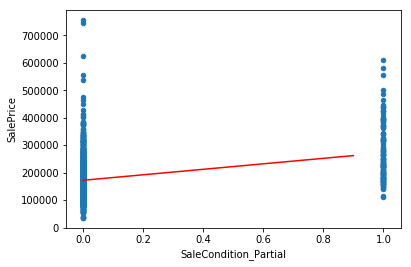

In [370]:
# plotting relationships between sale prices and categorical variable values
train_data_categ_dummies = pd.get_dummies(train_data_categ)
test_data_categ_dummies = pd.get_dummies(test_data_categ)

w1_list = []

for feature in train_data_categ_dummies.columns:
    #Scatter plot.
    ax = train_data_categ_dummies.plot(kind="scatter", x=feature,y="SalePrice")

    #Line of best fit (polynomial of degree 1).
    w1, w0 = np.polyfit(train_data_categ_dummies[feature], train_data_categ_dummies["SalePrice"],deg=1)
    feature_is_0 = train_data_categ_dummies[train_data_categ_dummies[feature] == 0].shape[0]
    w1_list.append((w1, feature_is_0, train_data_categ_dummies.shape[0] - feature_is_0, feature)) 
    #Plot line of best fit.
    rng = np.arange(np.min(train_data_categ_dummies[feature]),np.max(train_data_categ_dummies[feature]),0.1)
    ax.plot(rng,[w0+w1*x for x in rng],color="red")

During the following step I will choose create 3 datasets and test each of them on the models that I will build.

The first dataset contains those one-hot encoded variables from the total of 235, which fulfill the following criteria (these criteria were chosen subjectively):
- both groups' (which holds a True value and which holds a False value for the certain one-hot encoded variable) number of members exceeds 50 - this is important to choose robust enough variables only.
- the absolute value of the w1 score (the slope of the linear relationship) exceeds \$20 000 - this is important to only choose those variables that have large enough impact

The second dataset's variables fulfill only the first criterion.

The third dataset contains all the one-hot encoded variables.

This way the first dataset will contain 82, the second 101 and the third 235 one-hot encoded variables.

In [376]:
filtered_w1_on_member_number = [(i, j, k, l) for i, j, k, l in w1_list if (j > 50) & (k > 50)]
print(len(filtered_w1_on_member_number))

filtered_w1_on_member_number_plus_20k = [(i, j, k, l) for i, j, k, l in w1_list if (j > 50) & (k > 50) & (abs(i) > 20000)]
print(len(filtered_w1_on_member_number_plus_20k))

feature_list_20k = [l for i, j, k, l in filtered_w1_on_member_number_plus_20k]
feature_list_0k = [l for i, j, k, l in filtered_w1_on_member_number]

train_data_categ_dummies_20k = train_data_categ_dummies[feature_list_20k]
test_data_categ_dummies_20k = test_data_categ_dummies[feature_list_20k]

train_data_categ_dummies_0k = train_data_categ_dummies[feature_list_0k]
test_data_categ_dummies_0k = test_data_categ_dummies[feature_list_0k]

train_data_categ_dummies_no = train_data_categ_dummies
test_data_categ_dummies_no = test_data_categ_dummies



101
82


Imputation will happen as part of the pipelines that I will create to avoid errors and conflicts.

In [374]:
y = train_data_original.SalePrice

train_data_numeric_selected.drop(['SalePrice'], axis=1, inplace=True)

print(train_data_numeric.shape)
print(train_data_numeric_selected.shape)

(1460, 38)
(1460, 25)


In [391]:
train_data_categ_dummies.drop(['SalePrice'], axis=1, inplace=True)
train_data_categ_dummies.shape

(1460, 234)

In [392]:
train_data_final_20k = pd.concat([train_data_numeric_selected, train_data_categ_dummies_20k], axis=1)
test_data_final_20k = pd.concat([test_data_numeric_selected, test_data_categ_dummies_20k], axis=1)
train_data_final_20k, test_data_final_20k = train_data_final_20k.align(test_data_final_20k, join='left', axis=1)
print(train_data_final_20k.shape, test_data_final_20k.shape)

train_data_final_0k = pd.concat([train_data_numeric_selected, train_data_categ_dummies_0k], axis=1)
test_data_final_0k = pd.concat([test_data_numeric_selected, test_data_categ_dummies_0k], axis=1)
train_data_final_0k, test_data_final_0k = train_data_final_0k.align(test_data_final_0k, join='left', axis=1)
print(train_data_final_0k.shape, test_data_final_0k.shape)

train_data_final_no = pd.concat([train_data_numeric_selected, train_data_categ_dummies_no], axis=1)
test_data_final_no = pd.concat([test_data_numeric_selected, test_data_categ_dummies_no], axis=1)
train_data_final_no, test_data_final_no = train_data_final_no.align(test_data_final_no, join='left', axis=1)
print(train_data_final_no.shape, test_data_final_no.shape)

(1460, 107) (1459, 107)
(1460, 126) (1459, 126)
(1460, 259) (1459, 259)


### Implementation

First we split our preprocessed training data into training and validating sets. It will be needed when we will search for optimal estimator number at the xgboost model. Otherwise I will compare the performance of the various models based on the mean of cross validation scores where mean_absolute_error is the metric function. 

In [393]:
#
from sklearn.model_selection import train_test_split

train_X_20k, val_X_20k, train_y_20k, val_y_20k = train_test_split(train_data_final_20k, y, test_size=0.2, random_state=42)

train_X_0k, val_X_0k, train_y_0k, val_y_0k = train_test_split(train_data_final_0k, y, test_size=0.2, random_state=42)

train_X_no, val_X_no, train_y_no, val_y_no = train_test_split(train_data_final_no, y, test_size=0.2, random_state=42)

Then we create the benchmark model which is a linear regression model with all the predictors that we chose during the data preparation process.

In [400]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score

lin_reg_pipeline = make_pipeline(SimpleImputer(), LinearRegression())

score_20k = -cross_val_score(lin_reg_pipeline, train_data_final_20k, y, scoring='neg_mean_absolute_error', cv=5).mean()
print(f'The benchmark_20k score is: {score_20k}')

score_0k = -cross_val_score(lin_reg_pipeline, train_data_final_0k, y, scoring='neg_mean_absolute_error', cv=5).mean()
print(f'The benchmark_0k score is: {score_0k}')

score_no = -cross_val_score(lin_reg_pipeline, train_data_final_no, y, scoring='neg_mean_absolute_error', cv=5).mean()
print(f'The benchmark_no score is: {score_no}')


The benchmark_20k score is: 19699.7432220439
The benchmark_0k score is: 19745.226550653555
The benchmark_no score is: 18847.084224394195


It is apparent that the model with all the one-hot encoded variables is the best performing so I will choose this as a benchmark model. So the mean_absolute_error score that I will try to beat with different decision tree related models is **18847**.

Then we create the simple decision tree model without spcifying any parameter.

In [405]:
from sklearn.tree import DecisionTreeRegressor

decision_tree_pipeline = make_pipeline(SimpleImputer(), DecisionTreeRegressor(random_state=42))

score_20k = -cross_val_score(decision_tree_pipeline, train_data_final_20k, y, scoring='neg_mean_absolute_error', cv=5).mean()
print(f'The simple_decision_tree_20k score is: {score_20k}')

score_0k = -cross_val_score(decision_tree_pipeline, train_data_final_0k, y, scoring='neg_mean_absolute_error', cv=5).mean()
print(f'The simple_decision_tree_0k score is: {score_0k}')

score_no = -cross_val_score(decision_tree_pipeline, train_data_final_no, y, scoring='neg_mean_absolute_error', cv=5).mean()
print(f'The simple_decision_tree_no score is: {score_no}')

The simple_decision_tree_20k score is: 25405.112328767125
The simple_decision_tree_0k score is: 25964.117123287673
The simple_decision_tree_no score is: 25638.066438356163


Interestingly the multivariate linear regression model perform far better than the simple decision tree model and another interesting aspect is that categorical predictor selection doesn't improve the results of the decision tree model.

Let's optimize some parameters of the decision tree model with GridSearchCV.

In [333]:
from sklearn.model_selection import GridSearchCV

opt_tree_model = DecisionTreeRegressor(random_state=42)

parameters = {'max_leaf_nodes': (10, 50, 100, 150, 200), 'min_samples_leaf': (1, 5, 10, 15, 20)}

clf = GridSearchCV(opt_tree_model, parameters, cv=5)
clf.fit(train_X, train_y)
print(clf.best_estimator_)
clf.cv_results_

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=100, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=10,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')


C:\Users\Jancsi\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Jancsi\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Jancsi\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Jancsi\Anaconda3\lib\site-packages\sklearn\ut

{'mean_fit_time': array([0.01420951, 0.01540985, 0.01180797, 0.01120677, 0.01120825,
        0.01841226, 0.01821189, 0.01761017, 0.01601048, 0.01580939,
        0.0238152 , 0.02001305, 0.01741099, 0.01621003, 0.01501007,
        0.02621651, 0.02321377, 0.01761179, 0.01601067, 0.01501007,
        0.02861795, 0.02241426, 0.01781087, 0.01520944, 0.01420898]),
 'mean_score_time': array([0.00120072, 0.00120168, 0.00100036, 0.00080261, 0.00080009,
        0.0010006 , 0.00100079, 0.00060129, 0.00080104, 0.0008008 ,
        0.00100155, 0.00100102, 0.00100145, 0.00120096, 0.00100083,
        0.00100107, 0.0010015 , 0.00100093, 0.00120096, 0.00120101,
        0.00080113, 0.0010015 , 0.00100136, 0.00100117, 0.00080051]),
 'mean_test_score': array([0.5891832 , 0.64645305, 0.67400107, 0.67744027, 0.67457423,
        0.6848609 , 0.70774858, 0.73520847, 0.73843559, 0.72672503,
        0.67847581, 0.70775858, 0.74048996, 0.73843559, 0.72672503,
        0.67107198, 0.70742243, 0.74048996, 0.73843559, 0

We can see that the best performing params are 100 for max_leaf_nodes and 10 for min_samples_leaf. Let's see how the optimized tree model performs on the test set.

In [406]:
optimized_decision_tree_pipeline = make_pipeline(SimpleImputer(), DecisionTreeRegressor(max_leaf_nodes=100, min_samples_leaf= 10, random_state=42))

score_20k = -cross_val_score(optimized_decision_tree_pipeline, train_data_final_20k, y, scoring='neg_mean_absolute_error', cv=5).mean()
print(f'The optimized_decision_tree_20k score is: {score_20k}')

score_0k = -cross_val_score(optimized_decision_tree_pipeline, train_data_final_0k, y, scoring='neg_mean_absolute_error', cv=5).mean()
print(f'The optimized__decision_tree_0k score is: {score_0k}')

score_no = -cross_val_score(optimized_decision_tree_pipeline, train_data_final_no, y, scoring='neg_mean_absolute_error', cv=5).mean()
print(f'The optimized__decision_tree_no score is: {score_no}')

The optimized_decision_tree_20k score is: 24070.807643117463
The optimized__decision_tree_0k score is: 24111.915304759477
The optimized__decision_tree_no score is: 24093.415894434158


The score improved with about a 1000 points but this is still much worse than the benchmark score.

Let's examine what happens if we apply a random forest model without any parameter tuning.

In [407]:
from sklearn.ensemble import RandomForestRegressor

random_forest_pipeline = make_pipeline(SimpleImputer(), RandomForestRegressor(random_state=42))

score_20k = -cross_val_score(random_forest_pipeline, train_data_final_20k, y, scoring='neg_mean_absolute_error', cv=5).mean()
print(f'The random_forest_20k score is: {score_20k}')

score_0k = -cross_val_score(random_forest_pipeline, train_data_final_0k, y, scoring='neg_mean_absolute_error', cv=5).mean()
print(f'The random_forest_0k score is: {score_0k}')

score_no = -cross_val_score(random_forest_pipeline, train_data_final_no, y, scoring='neg_mean_absolute_error', cv=5).mean()
print(f'The random_forest_no score is: {score_no}')

C:\Users\Jancsi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Jancsi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Jancsi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Jancsi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Jancsi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

The random_forest_20k score is: 18802.70719178082


C:\Users\Jancsi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Jancsi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Jancsi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Jancsi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Jancsi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

The random_forest_0k score is: 18896.902465753425


C:\Users\Jancsi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Jancsi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Jancsi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Jancsi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Jancsi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

The random_forest_no score is: 19116.851643835613


The random forest model performs a little bit better than the benchmark model. It is interesting to see that the categorical predictor selection that I used has beneficial effect on the predictive performance.

Let's examine what happens if we use xgboost model. I will use GridSearchCV to find optimal parameters.

In [336]:
from xgboost import XGBRegressor

param_grid = {'n_estimators': (200, 250, 300, 350), 'learning_rate': (0.01, 0.03, 0.05, 0.07, 0.1)}
fit_params = {'eval_set': [(val_X, val_y)], 'early_stopping_rounds': 10, 'verbose': False}
xgboost_model = XGBRegressor(random_state=42)

clf = GridSearchCV(xgboost_model, param_grid=param_grid, fit_params=fit_params, cv=5)
clf.fit(train_X, train_y)
clf.best_params_

C:\Users\Jancsi\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:643: DeprecationWarning: "fit_params" as a constructor argument was deprecated in version 0.19 and will be removed in version 0.21. Pass fit parameters to the "fit" method instead.
  '"fit" method instead.', DeprecationWarning)


{'learning_rate': 0.05, 'n_estimators': 300}

Let's find optimal parameters also with a different method with the help of high n_estimator number and early_stopping.

In [348]:
xgboost_big_model = XGBRegressor(n_estimators=1000, learning_rate=0.05)
xgboost_big_model.fit(train_X, train_y, early_stopping_rounds=5, eval_set=[(val_X, val_y)], verbose=True)

[0]	validation_0-rmse:189607
Will train until validation_0-rmse hasn't improved in 5 rounds.
[1]	validation_0-rmse:180527
[2]	validation_0-rmse:171856
[3]	validation_0-rmse:163593
[4]	validation_0-rmse:155861
[5]	validation_0-rmse:148504
[6]	validation_0-rmse:141405
[7]	validation_0-rmse:134662
[8]	validation_0-rmse:128293
[9]	validation_0-rmse:122212
[10]	validation_0-rmse:116428
[11]	validation_0-rmse:110946
[12]	validation_0-rmse:105737
[13]	validation_0-rmse:100751
[14]	validation_0-rmse:95994.2
[15]	validation_0-rmse:91506
[16]	validation_0-rmse:87205.8
[17]	validation_0-rmse:83117.5
[18]	validation_0-rmse:79271.3
[19]	validation_0-rmse:75575.4
[20]	validation_0-rmse:72071.5
[21]	validation_0-rmse:68757.8
[22]	validation_0-rmse:65569.4
[23]	validation_0-rmse:62570.9
[24]	validation_0-rmse:59714.4
[25]	validation_0-rmse:56960
[26]	validation_0-rmse:54383.4
[27]	validation_0-rmse:51909.5
[28]	validation_0-rmse:49575.5
[29]	validation_0-rmse:47412.2
[30]	validation_0-rmse:45301.8
[31

[259]	validation_0-rmse:8895.93
[260]	validation_0-rmse:8895.46
[261]	validation_0-rmse:8893.97
[262]	validation_0-rmse:8893.51
[263]	validation_0-rmse:8892.07
[264]	validation_0-rmse:8891.63
[265]	validation_0-rmse:8890.26
[266]	validation_0-rmse:8889.85
[267]	validation_0-rmse:8888.99
[268]	validation_0-rmse:8887.72
[269]	validation_0-rmse:8887.34
[270]	validation_0-rmse:8886.52
[271]	validation_0-rmse:8885.29
[272]	validation_0-rmse:8884.49
[273]	validation_0-rmse:8884.16
[274]	validation_0-rmse:8883.03
[275]	validation_0-rmse:8883.07
[276]	validation_0-rmse:8882.52
[277]	validation_0-rmse:8882.24
[278]	validation_0-rmse:8882.18
[279]	validation_0-rmse:8882.04
[280]	validation_0-rmse:8881.95
[281]	validation_0-rmse:8880.91
[282]	validation_0-rmse:8880.95
[283]	validation_0-rmse:8880.9
[284]	validation_0-rmse:8880.77
[285]	validation_0-rmse:8880.97
[286]	validation_0-rmse:8880.98
[287]	validation_0-rmse:8879.93
[288]	validation_0-rmse:8879.88
[289]	validation_0-rmse:8879.88
[290]	val

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.05, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [31]:
xgboost_pipeline = make_pipeline(SimpleImputer(), XGBRegressor(random_state=42))

score_20k = -cross_val_score(xgboost_pipeline, train_data_final_20k, y, scoring='neg_mean_absolute_error', cv=5).mean()
print(f'The xgboost_20k score is: {score_20k}')

score_0k = -cross_val_score(xgboost_pipeline, train_data_final_0k, y, scoring='neg_mean_absolute_error', cv=5).mean()
print(f'The xgboost_0k score is: {score_0k}')

score_no = -cross_val_score(xgboost_pipeline, train_data_final_no, y, scoring='neg_mean_absolute_error', cv=5).mean()
print(f'The xgboost_no score is: {score_no}')

The xgboost_20k score is: 16708.07733572346
The xgboost_0k score is: 16709.153432684074
The xgboost_no score is: 16645.21109803082


In [408]:
xgboost_pipeline = make_pipeline(SimpleImputer(), XGBRegressor(n_estimators=300, learning_rate=0.05, random_state=42))

score_20k = -cross_val_score(xgboost_pipeline, train_data_final_20k, y, scoring='neg_mean_absolute_error', cv=5).mean()
print(f'The xgboost_20k score is: {score_20k}')

score_0k = -cross_val_score(xgboost_pipeline, train_data_final_0k, y, scoring='neg_mean_absolute_error', cv=5).mean()
print(f'The xgboost_0k score is: {score_0k}')

score_no = -cross_val_score(xgboost_pipeline, train_data_final_no, y, scoring='neg_mean_absolute_error', cv=5).mean()
print(f'The xgboost_no score is: {score_no}')

The xgboost_20k score is: 16293.52149775257
The xgboost_0k score is: 16318.583085402395
The xgboost_no score is: 16144.532344285102


Apparently the xgboost model is significantly better than the random forest model and the benchmark model. Categorical predictor variable selection doesn't have significant effect on predictive performance.

### Refinement

In the beginning I tried a completely different categorical model selection technique in which I tested categorical variables one by one (not the one-hot encoded variables but the original ones) and I chose those variables to include in the model which improved the prediction score and omitted those which actually worsened it.

Previously I used train_test_split to divide the training data into training and testing set but later I realized that this approach results unreliable performance scores, so I started to use cross_val_scores instead with 5-fold partitioning which was far better. Regarding the fact that the dataset is relatively small cross validation has big beneficial effect.

Initially I didn't use GridSearchCV to find optimal parameters.

The use of pipelines made everything much cleaner and concise - it helped the most for applying imputation because it can mess up many things if it isn't applied in the right order.

I tried the deletion of rows with missing values but I realized it is better to use imputation with mean values to avoid data loss.

Initially I tried only the plus_20k dataset on my models but I assumed that the inclusion of more of the categorical variables may produce better predictive performance and I decided to create three level of categorical predictor inclusion to test which model performs the in which conditions.

## IV. Results


### Model Evaluation and Validation

The final model is an xgboost regression model with 300 estimators and a learning rate of 0.05. I used imputation for missing values. I selected 25 numerical predictors and 82 one-hot encoded categorical predictors.

I chose the final model after comparing 3 datasets with different predictors and 5 models from which the firs was the multivariate linear regression model that I chose as a benchmark model.

### Justification

My final model produced significantly better prediction results (16293 mean absolute error points) than the benchmark model (18847 mean absolute error points) which was validated with cross validation scores and also on the test set of the kaggle competition so the results are robust and significant.

The best official score that I achieved on the real test_data during the competition with xgboost and categorical predictor selection was 15049.07939 with which I ranked 48th from 793 competitors.

## V. Conclusion


### Free-Form Visualization

In this section I will show some partial dependence plots that visualize the effect of the certain variable on the target variable.

In [417]:
train_data_numeric_selected.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'ScreenPorch',
       'PoolArea'],
      dtype='object')

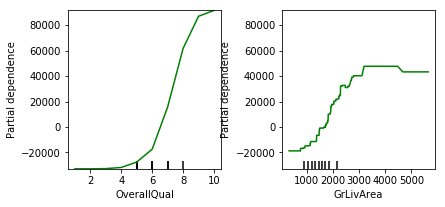

In [420]:
from sklearn.ensemble.partial_dependence import plot_partial_dependence
from sklearn.ensemble import GradientBoostingRegressor

my_imputer = SimpleImputer()
train_data_final_20k_imputed = my_imputer.fit_transform(train_data_final_20k)
my_model = GradientBoostingRegressor()
my_model.fit(train_data_final_20k_imputed, y)

my_plots = plot_partial_dependence(my_model,
                                   features = [2, 11],
                                   X=train_data_final_20k_imputed,
                                   feature_names=list(train_data_numeric_selected.columns),
                                   grid_resolution=1000)

From these graphs we get some useful insights about how much the investigated variable changes sale prices in different intervals. Thus we can decide more easily whether a difference between two houses' characteristics is a significant one or not.

### Reflection

I think this dataset is a really well curated one with which it was quite easy to work with. The problem itself was really straightforward. After thorough data exploration the data preparation wasn't particularly difficult but definitely this part was the most time consuming. It was really interesting to see how different levels of categorical variable inclusion effected the performance of the investigated model. In summary I can say that all of the examined models were quite neutral which set of categorical variables we used.

The high performance of the benchmark model (multivariate linear regression) was impressive because it is a really basic and simple one which doesn't require any parameter tuning. It was nice to see how the different type of decision tree related models performed compared to each other and to the benchmark model. The derived results are consistent with the complexities of the certain models. 

Finally we could find a highly optimized ensemble decision tree model, namely xgboost model, which superseded the benchmark model significantly so I would say that original aim of the project have been met.

### Improvement

Further improvements could be made by trying to implement other supervised learning models which are possibly able to perform even better than the used ones or by optimizing certain parameters of the ones that I examined in this study.

In general it is a good idea to apply unsupervised learning algorithms to select the most important predictor variables which I didn't leveraged in this study but it is surely worthy for further investigation.

The best score that was achieved in the competition by the time of the completion of this project was 12285 points which is significantly better than what we were able to reach so there is certainly room for improvement. Nevertheless I am happy to be in the 94th percentile.